In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import netCDF4
import pandas as pd
import seaborn as sns
from scipy import signal
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.pyplot import MultipleLocator

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
Years = [17,18]
Months = [1,2,9,10,11,12]
Days31 = list(range(1,32))
Days30 = list(range(1,31))
Days28 = list(range(1,29))
Hours = list(range(0,24))

pd_data1D_SW = pd.Series(dtype='float64',name='ACCESS_SW')
pd_data1D_LW = pd.Series(dtype='float64',name='ACCESS_LW')
ACCESS_CRE = pd.Series(dtype='float64',name='ACCESS_CRE')

In [3]:
daily_obs_SW = pd.Series(dtype='float64',name='Pyranometer_Avg')
daily_obs_LW = pd.Series(dtype='float64',name='Pyrgeometer_Avg')
daily_obs_CRE = pd.Series(dtype='float64',name='CRE')
hourly_obs_SW = pd.Series(dtype='float64',name='Hourly_SW')
hourly_obs_LW = pd.Series(dtype='float64',name='Hourly_LW')
hourly_obs_CRE = pd.Series(dtype='float64',name='Hourly_CRE')
Spot_time = pd.Series(dtype='float64',name='Spot_Time')

In [4]:
for Year in Years:
    for Month in Months:
            if (Year == 17) and (Month < 9):
                continue
            elif (Year == 18) and (Month > 2):
                continue
            else:
                if (Month == 1) or (Month == 10) or (Month == 12):
                    for Day in Days31:
                        filename = '/Users/peizhangcheng/Desktop/Datasets/ACCESS_hourly/cc407a.ph.met20' + str(Year) + str(Month).rjust(2,'0') + str(Day).rjust(2,'0') + '.nc'
                        data = xr.open_dataset(filename)
                        data1D = data.interp(lat=-54.6208, lon=158.8556)
                        # open the model output
                        
                        pd_data1D_rsds = pd.Series(data1D.rsds.to_pandas(),name='rsds')
                        pd_data1D_rlds = pd.Series(data1D.rlds.to_pandas(),name='rlds')
                        pd_data1D_rsdscs = pd.Series(data1D.rsdscs.to_pandas(),name='rsdscs')
                        pd_data1D_rldscs = pd.Series(data1D.rldscs.to_pandas(),name='rldscs')
                        pd_data1D_SW = pd.concat([pd_data1D_SW, pd_data1D_rsds], axis=0)                   
                        pd_data1D_LW = pd.concat([pd_data1D_LW, pd_data1D_rlds], axis=0)
                        ACCESS_CRE1 = (1-0.055)*(pd_data1D_rsds-pd_data1D_rsdscs)+0.97*(pd_data1D_rlds-pd_data1D_rldscs)
                        ACCESS_CRE = pd.concat([ACCESS_CRE, ACCESS_CRE1], axis=0) 
                        
                elif (Month == 11) or (Month == 9):
                    for Day in Days30:
                        filename = '/Users/peizhangcheng/Desktop/Datasets/ACCESS_hourly/cc407a.ph.met20' + str(Year) + str(Month).rjust(2,'0') + str(Day).rjust(2,'0') + '.nc'
                        data = xr.open_dataset(filename)
                        data1D = data.interp(lat=-54.6208, lon=158.8556)
                        # open the model output
                        pd_data1D_rsds = pd.Series(data1D.rsds.to_pandas(),name='rsds')
                        pd_data1D_rlds = pd.Series(data1D.rlds.to_pandas(),name='rlds')
                        pd_data1D_rsdscs = pd.Series(data1D.rsdscs.to_pandas(),name='rsdscs')
                        pd_data1D_rldscs = pd.Series(data1D.rldscs.to_pandas(),name='rldscs')
                        pd_data1D_SW = pd.concat([pd_data1D_SW, pd_data1D_rsds], axis=0)                   
                        pd_data1D_LW = pd.concat([pd_data1D_LW, pd_data1D_rlds], axis=0)
                        ACCESS_CRE1 = (1-0.055)*(pd_data1D_rsds-pd_data1D_rsdscs)+0.97*(pd_data1D_rlds-pd_data1D_rldscs)
                        ACCESS_CRE = pd.concat([ACCESS_CRE, ACCESS_CRE1], axis=0) 
                        
                else:
                    for Day in Days28:
                        filename = '/Users/peizhangcheng/Desktop/Datasets/ACCESS_hourly/cc407a.ph.met20' + str(Year) + str(Month).rjust(2,'0') + str(Day).rjust(2,'0') + '.nc'
                        data = xr.open_dataset(filename)
                        data1D = data.interp(lat=-54.6208, lon=158.8556)
                        # open the model output
                        pd_data1D_rsds = pd.Series(data1D.rsds.to_pandas(),name='rsds')
                        pd_data1D_rlds = pd.Series(data1D.rlds.to_pandas(),name='rlds')
                        pd_data1D_rsdscs = pd.Series(data1D.rsdscs.to_pandas(),name='rsdscs')
                        pd_data1D_rldscs = pd.Series(data1D.rldscs.to_pandas(),name='rldscs')
                        pd_data1D_SW = pd.concat([pd_data1D_SW, pd_data1D_rsds], axis=0)                   
                        pd_data1D_LW = pd.concat([pd_data1D_LW, pd_data1D_rlds], axis=0)
                        ACCESS_CRE1 = (1-0.055)*(pd_data1D_rsds-pd_data1D_rsdscs)+0.97*(pd_data1D_rlds-pd_data1D_rldscs)
                        ACCESS_CRE = pd.concat([ACCESS_CRE, ACCESS_CRE1], axis=0)

In [5]:
ACCESS_SW = pd_data1D_SW.resample('H').mean()
ACCESS_LW = pd_data1D_LW.resample('H').mean()
ACCESS_CRE = ACCESS_CRE.resample('H').mean()

In [6]:
daily_obs_Alt = pd.Series(dtype='float64',name='Solar Altitude')

In [7]:
for Year in Years:
    for Month in Months:
        if (Year == 17) and (Month < 9):
            continue
        elif (Year == 18) and (Month > 2):
            continue
        else:
            fdir = '/Users/peizhangcheng/Desktop/UTAS/Honours/Project/MQI Radiometers/Cloud_' + str(Year) + str(Month).rjust(2,'0') + '.csv'
            daily_obs = pd.read_csv(fdir) 
            # open the observational data

            daily_obs.index = pd.DatetimeIndex(daily_obs['DateTimeUT'])
            daily_obs = daily_obs.dropna()
            daily_obs.columns = ['DateTimeUT','ClearSky_BdR','ClearSky_BmR','Saturated_Percent','Solar_Altitude']
            
            daily_obs_Alt = pd.concat([daily_obs_Alt, daily_obs.Solar_Altitude], axis=0)
            
                # concat the observational data and model output

In [8]:
for Year in Years:
    for Month in Months:
            if (Year == 17) and (Month < 9):
                continue
            elif (Year == 18) and (Month > 2):
                continue
            else:
                fdir = '/Users/peizhangcheng/Desktop/UTAS/Honours/Project/MQI Radiometers/Radiation_' + str(Year) + str(Month).rjust(2,'0') + '.csv'
                daily_obs = pd.read_csv(fdir) 
                # open the observational data
                        
                daily_obs.index = pd.DatetimeIndex(daily_obs['DateTimeUT'])
                daily_obs = daily_obs.dropna()
                daily_obs.columns = ['DateTimeUT','Pyranometer_Avg','Pyrgeometer_Avg','CRE','SW_CRE','LW_CRE','SW_clr','LW_clr']
                
                daily_obs_SW = pd.concat([daily_obs_SW, daily_obs.Pyranometer_Avg], axis=0)
                daily_obs_LW = pd.concat([daily_obs_LW, daily_obs.Pyrgeometer_Avg], axis=0)
                daily_obs_CRE = pd.concat([daily_obs_CRE, daily_obs.CRE], axis=0)

In [9]:
daily_obs_SW

2017-09-01 00:00:00     73.141993
2017-09-01 00:01:00     74.283239
2017-09-01 00:02:00     73.677259
2017-09-01 00:03:00     71.988884
2017-09-01 00:04:00     71.682622
                          ...    
2018-02-28 23:55:00    678.977031
2018-02-28 23:56:00    679.551788
2018-02-28 23:57:00    680.611051
2018-02-28 23:58:00    681.697183
2018-02-28 23:59:00    683.100867
Name: Pyranometer_Avg, Length: 260640, dtype: float64

In [10]:
data20minSW = []
data20minLW = []
data20minCRE = []

for i in range(260640):
    crt_time = str(daily_obs_SW.index[i])
    if crt_time[14:16] == '20':
        data20minSW.append(daily_obs_SW[i])
        data20minLW.append(daily_obs_LW[i])    
        data20minCRE.append(daily_obs_CRE[i]) 

In [11]:
data20minAlt = []
for i in range(len(daily_obs_Alt)):
    crt_time = str(daily_obs_Alt.index[i])
    if crt_time[14:16] == '20':
        data20minAlt.append(daily_obs_Alt[i])

In [11]:
for Year in Years:
    for Month in Months:
            if (Year == 17) and (Month < 9):
                continue
            elif (Year == 18) and (Month > 2):
                continue
            else:
                if (Month == 1) or (Month == 10) or (Month == 12):
                    for Day in Days31:
                        for Hour in Hours:
                            newtime = '20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + ' ' + str(Hour).rjust(2,'0') + ':' + '20' + ':' + '00'
                            newtime = pd.Series(newtime,name='newtime')
                            Spot_time = pd.concat([Spot_time, newtime], axis=0)
                
                elif (Month == 11) or (Month == 9):    
                    for Day in Days30:
                        for Hour in Hours:
                            newtime = '20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + ' ' + str(Hour).rjust(2,'0') + ':' + '20' + ':' + '00'
                            newtime = pd.Series(newtime,name='newtime')
                            Spot_time = pd.concat([Spot_time, newtime], axis=0)
                
                else:
                    for Day in Days28:
                        for Hour in Hours:
                            newtime = '20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + ' ' + str(Hour).rjust(2,'0') + ':' + '20' + ':' + '00'
                            newtime = pd.Series(newtime,name='newtime')
                            Spot_time = pd.concat([Spot_time, newtime], axis=0)

In [12]:
Spot_times = pd.DatetimeIndex(Spot_time)

In [13]:
hourly_obs_SW = pd.Series(data20minSW, name='Hourly SW')
hourly_obs_LW = pd.Series(data20minLW, name='Hourly LW')
hourly_obs_CRE = pd.Series(data20minCRE, name='Hourly CRE')

In [14]:
hourly_obs_SW

0       122.003792
1       170.693608
2       145.318310
3       114.079957
4       103.183283
           ...    
4339     19.077660
4340    204.667931
4341    336.890358
4342    410.457746
4343    651.020152
Name: Hourly SW, Length: 4344, dtype: float64

In [15]:
Spot_times

DatetimeIndex(['2017-09-01 00:20:00', '2017-09-01 01:20:00',
               '2017-09-01 02:20:00', '2017-09-01 03:20:00',
               '2017-09-01 04:20:00', '2017-09-01 05:20:00',
               '2017-09-01 06:20:00', '2017-09-01 07:20:00',
               '2017-09-01 08:20:00', '2017-09-01 09:20:00',
               ...
               '2018-02-28 14:20:00', '2018-02-28 15:20:00',
               '2018-02-28 16:20:00', '2018-02-28 17:20:00',
               '2018-02-28 18:20:00', '2018-02-28 19:20:00',
               '2018-02-28 20:20:00', '2018-02-28 21:20:00',
               '2018-02-28 22:20:00', '2018-02-28 23:20:00'],
              dtype='datetime64[ns]', length=4344, freq=None)

In [16]:
hourly_obs_SW.index = Spot_times
hourly_obs_LW.index = Spot_times
hourly_obs_CRE.index = Spot_times

In [15]:
obs_Alt = daily_obs_Alt.resample('H').mean()

In [16]:
obs_Alt

2017-09-01 00:00:00    26.071923
2017-09-01 01:00:00    27.122840
2017-09-01 02:00:00    25.677709
2017-09-01 03:00:00    21.915814
2017-09-01 04:00:00    16.245590
                         ...    
2018-02-28 19:00:00     5.273493
2018-02-28 20:00:00    13.939224
2018-02-28 21:00:00    22.390349
2018-02-28 22:00:00    30.157461
2018-02-28 23:00:00    36.653243
Freq: H, Length: 4344, dtype: float64

In [18]:
date_Alt_day = []
date_Alt_night = []

In [19]:
for i in np.arange(len(obs_Alt)):
    if obs_Alt[i] > 10:
        date_Alt_day.append(str(obs_Alt.index[i]))
    else:
        date_Alt_night.append(str(obs_Alt.index[i]))
    

NameError: name 'obs_Alt' is not defined

In [19]:
date_Alt_day

['2017-09-01 00:00:00',
 '2017-09-01 01:00:00',
 '2017-09-01 02:00:00',
 '2017-09-01 03:00:00',
 '2017-09-01 04:00:00',
 '2017-09-01 21:00:00',
 '2017-09-01 22:00:00',
 '2017-09-01 23:00:00',
 '2017-09-02 00:00:00',
 '2017-09-02 01:00:00',
 '2017-09-02 02:00:00',
 '2017-09-02 03:00:00',
 '2017-09-02 04:00:00',
 '2017-09-02 21:00:00',
 '2017-09-02 22:00:00',
 '2017-09-02 23:00:00',
 '2017-09-03 00:00:00',
 '2017-09-03 01:00:00',
 '2017-09-03 02:00:00',
 '2017-09-03 03:00:00',
 '2017-09-03 04:00:00',
 '2017-09-03 21:00:00',
 '2017-09-03 22:00:00',
 '2017-09-03 23:00:00',
 '2017-09-04 00:00:00',
 '2017-09-04 01:00:00',
 '2017-09-04 02:00:00',
 '2017-09-04 03:00:00',
 '2017-09-04 04:00:00',
 '2017-09-04 21:00:00',
 '2017-09-04 22:00:00',
 '2017-09-04 23:00:00',
 '2017-09-05 00:00:00',
 '2017-09-05 01:00:00',
 '2017-09-05 02:00:00',
 '2017-09-05 03:00:00',
 '2017-09-05 04:00:00',
 '2017-09-05 05:00:00',
 '2017-09-05 21:00:00',
 '2017-09-05 22:00:00',
 '2017-09-05 23:00:00',
 '2017-09-06 00:

In [20]:
date_Alt_night

['2017-09-01 05:00:00',
 '2017-09-01 06:00:00',
 '2017-09-01 07:00:00',
 '2017-09-01 08:00:00',
 '2017-09-01 09:00:00',
 '2017-09-01 10:00:00',
 '2017-09-01 11:00:00',
 '2017-09-01 12:00:00',
 '2017-09-01 13:00:00',
 '2017-09-01 14:00:00',
 '2017-09-01 15:00:00',
 '2017-09-01 16:00:00',
 '2017-09-01 17:00:00',
 '2017-09-01 18:00:00',
 '2017-09-01 19:00:00',
 '2017-09-01 20:00:00',
 '2017-09-02 05:00:00',
 '2017-09-02 06:00:00',
 '2017-09-02 07:00:00',
 '2017-09-02 08:00:00',
 '2017-09-02 09:00:00',
 '2017-09-02 10:00:00',
 '2017-09-02 11:00:00',
 '2017-09-02 12:00:00',
 '2017-09-02 13:00:00',
 '2017-09-02 14:00:00',
 '2017-09-02 15:00:00',
 '2017-09-02 16:00:00',
 '2017-09-02 17:00:00',
 '2017-09-02 18:00:00',
 '2017-09-02 19:00:00',
 '2017-09-02 20:00:00',
 '2017-09-03 05:00:00',
 '2017-09-03 06:00:00',
 '2017-09-03 07:00:00',
 '2017-09-03 08:00:00',
 '2017-09-03 09:00:00',
 '2017-09-03 10:00:00',
 '2017-09-03 11:00:00',
 '2017-09-03 12:00:00',
 '2017-09-03 13:00:00',
 '2017-09-03 14:

In [17]:
obs_SW = hourly_obs_SW.resample('H').mean()
obs_LW = hourly_obs_LW.resample('H').mean()
obs_CRE = hourly_obs_CRE.resample('H').mean()
ACCESS_SW = pd.Series(ACCESS_SW, name='ACCESS SW')
ACCESS_LW = pd.Series(ACCESS_LW, name='ACCESS LW')
ACCESS_CRE = pd.Series(ACCESS_CRE, name='ACCESS CRE')

In [18]:
Whole = pd.concat([obs_SW,ACCESS_SW,obs_LW,ACCESS_LW,obs_CRE,ACCESS_CRE], axis=1)

In [19]:
Whole['SW_bias'] = Whole['ACCESS SW'] - Whole['Hourly SW']
Whole['LW_bias'] = Whole['ACCESS LW'] - Whole['Hourly LW']
Whole['CRE_bias'] = Whole['ACCESS CRE'] - Whole['Hourly CRE']

In [20]:
Whole

,Hourly SW,ACCESS SW,Hourly LW,ACCESS LW,Hourly CRE,ACCESS CRE,SW_bias,LW_bias,CRE_bias
2017-09-01 00:00:00,122.003792,NaN,342.052581,NaN,-233.244559,NaN,NaN,NaN,NaN
2017-09-01 01:00:00,170.693608,251.646141,342.734666,325.128591,-212.549974,-98.471130,80.952533,-17.606075,114.078844
2017-09-01 02:00:00,145.318310,207.346371,342.440782,308.880458,-218.392816,-134.678957,62.028061,-33.560324,83.713858
2017-09-01 03:00:00,114.079957,175.717723,342.542053,330.371989,-187.304732,-82.630105,61.637767,-12.170064,104.674627
2017-09-01 04:00:00,103.183283,103.870308,341.135238,326.263232,-101.459891,-61.199996,0.687025,-14.872006,40.259895
...,...,...,...,...,...,...,...,...,...
2018-02-28 19:00:00,19.077660,22.697097,263.235581,316.810028,-23.452437,31.850193,3.619437,53.574446,55.302629
2018-02-28 20:00:00,204.667931,136.637233,272.118905,283.543060,2.537147,-29.876271,-68.030698,11.424155,-32.413419
2018-02-28 21:00:00,336.890358,234.405444,262.797450,280.493216,-42.899031,-90.748121,-102.484914,17.695767,-47.849090
2018-02-28 22:00:00,410.457746,401.388677,270.749217,304.546050,-112.200251,-47.644378,-9.069070,33.796833,64.555873


In [21]:
SW_bias = Whole['SW_bias'].dropna()
LW_bias = Whole['LW_bias'].dropna()
CRE_bias = Whole['CRE_bias'].dropna()

In [22]:
SW_bias

2017-09-01 01:00:00     80.952533
2017-09-01 02:00:00     62.028061
2017-09-01 03:00:00     61.637767
2017-09-01 04:00:00      0.687025
2017-09-01 05:00:00    -24.805842
                          ...    
2018-02-28 19:00:00      3.619437
2018-02-28 20:00:00    -68.030698
2018-02-28 21:00:00   -102.484914
2018-02-28 22:00:00     -9.069070
2018-02-28 23:00:00   -186.257340
Freq: H, Name: SW_bias, Length: 4343, dtype: float64

In [23]:
print(np.quantile(SW_bias,0.1))
print(np.quantile(SW_bias,0.3))
print(np.quantile(SW_bias,0.7))
print(np.quantile(SW_bias,0.9))
print(np.quantile(LW_bias,0.1))
print(np.quantile(LW_bias,0.3))
print(np.quantile(LW_bias,0.7))
print(np.quantile(LW_bias,0.9))
print(np.quantile(CRE_bias,0.1))
print(np.quantile(CRE_bias,0.3))
print(np.quantile(CRE_bias,0.7))
print(np.quantile(CRE_bias,0.9))

-99.63756345709528
-0.0014302671665975238
17.34521751080284
158.63003767151662
-31.96135913974885
-12.124224957541083
6.586094478335478
37.14133958520213
-42.964510356910246
-7.1974700900887605
57.248723140007506
191.0040614014912


In [24]:
date_SW_negative = []
date_SW_medium = []
date_SW_positive = []
date_LW_negative = []
date_LW_medium = []
date_LW_positive = []
date_CRE_negative = []
date_CRE_medium = []
date_CRE_positive = []

In [25]:
for i in np.arange(len(SW_bias)):
    if SW_bias[i] < -100:
        date_SW_negative.append(str(SW_bias.index[i]))
    elif SW_bias[i] < 20 and SW_bias[i] > -20:
        date_SW_medium.append(str(SW_bias.index[i]))
    elif SW_bias[i] > 160:
        date_SW_positive.append(str(SW_bias.index[i]))

In [26]:
len(date_SW_negative)

433

In [27]:
len(date_SW_positive)

432

In [28]:
for i in np.arange(len(LW_bias)):
    if LW_bias[i] < -30:
        date_LW_negative.append(str(LW_bias.index[i]))
    elif LW_bias[i] < 12 and LW_bias[i] > -12:
        date_LW_medium.append(str(LW_bias.index[i]))
    elif LW_bias[i] > 40:
        date_LW_positive.append(str(LW_bias.index[i]))

In [29]:
len(date_LW_negative)

481

In [30]:
len(date_LW_positive)

384

In [31]:
for i in np.arange(len(CRE_bias)):
    if CRE_bias[i] < -40:
        date_CRE_negative.append(str(CRE_bias.index[i]))
    elif CRE_bias[i] < 10 and CRE_bias[i] > -10:
        date_CRE_medium.append(str(CRE_bias.index[i]))
    elif CRE_bias[i] > 190:
        date_CRE_positive.append(str(CRE_bias.index[i]))

In [50]:
date_Alt_day1 = date_Alt_day[1:300]

In [51]:
date_Alt_day2 = date_Alt_day[300:600]

In [52]:
date_Alt_day3 = date_Alt_day[600:900]

In [53]:
date_Alt_day4 = date_Alt_day[900:1200]

In [54]:
date_Alt_day5 = date_Alt_day[1200:1500]

In [55]:
date_Alt_day6 = date_Alt_day[1500:1800]

In [56]:
date_Alt_day7 = date_Alt_day[1800:2100]

In [57]:
date_Alt_day8 = date_Alt_day[2100:]

In [34]:
date_Alt_day = date_Alt_day[1:]

In [45]:
date_Alt_day

['2017-09-01 01:00:00',
 '2017-09-01 02:00:00',
 '2017-09-01 03:00:00',
 '2017-09-01 04:00:00',
 '2017-09-01 21:00:00',
 '2017-09-01 22:00:00',
 '2017-09-01 23:00:00',
 '2017-09-02 00:00:00',
 '2017-09-02 01:00:00',
 '2017-09-02 02:00:00',
 '2017-09-02 03:00:00',
 '2017-09-02 04:00:00',
 '2017-09-02 21:00:00',
 '2017-09-02 22:00:00',
 '2017-09-02 23:00:00',
 '2017-09-03 00:00:00',
 '2017-09-03 01:00:00',
 '2017-09-03 02:00:00',
 '2017-09-03 03:00:00',
 '2017-09-03 04:00:00',
 '2017-09-03 21:00:00',
 '2017-09-03 22:00:00',
 '2017-09-03 23:00:00',
 '2017-09-04 00:00:00',
 '2017-09-04 01:00:00',
 '2017-09-04 02:00:00',
 '2017-09-04 03:00:00',
 '2017-09-04 04:00:00',
 '2017-09-04 21:00:00',
 '2017-09-04 22:00:00',
 '2017-09-04 23:00:00',
 '2017-09-05 00:00:00',
 '2017-09-05 01:00:00',
 '2017-09-05 02:00:00',
 '2017-09-05 03:00:00',
 '2017-09-05 04:00:00',
 '2017-09-05 05:00:00',
 '2017-09-05 21:00:00',
 '2017-09-05 22:00:00',
 '2017-09-05 23:00:00',
 '2017-09-06 00:00:00',
 '2017-09-06 01:

In [47]:
for i in date_Alt_day1:
    time1 = i[:10] + 'T' + i[11:]
    filename = '/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS-AM2/processed/model/' + time1[:11] + '000000.nc'
    data = xr.open_dataset(filename)
    if i[11:13] == '00':
        new_time = time1[:11] + '00:15:00'
        new = data.sel(time=new_time)
    else:
        new = data.sel(time=time1)
    if i[:13] == '2017-09-01' + ' ' + '01':
        new_all = new
    else:
        new_all = xr.merge([new_all,new])

In [52]:
for i in date_CRE_positive:
    time = i[:10] + 'T' + i[11:]
    filename = '/Users/peizhangcheng/Desktop/ALCF/MQI_Ceilometer/Macquarie Island (CL51)/raw/' + time[:11] + time[11:13] + '00.nc'
    data = xr.open_dataset(filename)
    data.to_netcdf('/Users/peizhangcheng/Desktop/ALCF/MQI_Ceilometer/MI_posCRE/raw/' + time[:11] + time[11:13] + '00.nc')

In [48]:
new_all

<xarray.Dataset>
Dimensions:    (bnds: 2, level: 85, time: 299)
Coordinates:
  * time       (time) datetime64[ns] 2017-09-01T02:00:00.000013 ... 2017-10-0...
Dimensions without coordinates: bnds, level
Data variables:
    lat        (time) float64 -54.38 -54.38 -54.38 ... -54.38 -54.38 -54.38
    lon        (time) float64 158.4 158.4 158.4 158.4 ... 158.4 158.4 158.4
    ps         (time) float64 1.019e+05 1.018e+05 ... 9.888e+04 9.881e+04
    ta         (time, level) float64 279.6 279.1 278.7 ... 202.7 189.7 181.4
    cl         (time, level) float64 0.0 0.0 0.0 0.0 12.65 ... 0.0 0.0 0.0 0.0
    pfull      (time, level) float64 1.016e+05 1.012e+05 ... 0.7114 0.2388
    clw        (time, level) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    cli        (time, level) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    zfull      (time, level) float64 20.0 53.33 100.0 ... 7.91e+04 8.5e+04
    orog       (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    time_bnds  (time, bnds) datetime64[ns] 2017-09-01T01:30:00 ... 2017-10-03...

In [49]:
new_all.to_netcdf('/Volumes/My Passport/ALCF/alcf-tutorial-datasets/Alt/model/model1.nc')

In [34]:
for Year in Years:
    for Month in Months:
            if (Year == 17) and (Month < 9):
                continue
            elif (Year == 18) and (Month > 2):
                continue
            else:
                if (Month == 1) or (Month == 10) or (Month == 12):
                    for Day in Days31:
                        filename = '/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS-AM2/processed/model/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc'
                        data = xr.open_dataset(filename)

                        for orig_time in data.time:
                            key_time = str(orig_time.values)[:19]
                            
                            if int(key_time[14]) > 3:
                                time = key_time[:10] + ' ' + key_time[11] + str(int(key_time[12])+1) + ':00:00'
                            else:
                                time = key_time[:10] + ' ' + key_time[11:13] + ':00:00'
                                
                            seq = int(time[11:13])
                            
                            if time not in list(date_SW_negative):
                                data.variables['cl'][seq] = np.nan
                            
                        data.to_netcdf('/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS_SWbias/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc')
                        
                elif (Month == 11) or (Month == 9):
                    for Day in Days30:
                        filename = '/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS-AM2/processed/model/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc'
                        data = xr.open_dataset(filename)
                                         
                        for orig_time in data.time:
                            key_time = str(orig_time.values)[:19]
                            
                            if int(key_time[14]) > 3:
                                time = key_time[:10] + ' ' + key_time[11] + str(int(key_time[12])+1) + ':00:00'
                            else:
                                time = key_time[:10] + ' ' + key_time[11:13] + ':00:00'
                                
                            if  Month == 9:
                                seq = int(time[11:13]) - 1
                            else:
                                seq = int(time[11:13])
                                
                            if time not in list(date_SW_negative):
                                data.variables['cl'][seq] = np.nan
                            
                        data.to_netcdf('/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS_SWbias/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc')
                        
                else:
                    for Day in Days28:
                        filename = '/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS-AM2/processed/model/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc'
                        data = xr.open_dataset(filename)
                        
                        for orig_time in data.time:
                            key_time = str(orig_time.values)[:19]
                            
                            if int(key_time[14]) > 3:
                                time = key_time[:10] + ' ' + key_time[11] + str(int(key_time[12])+1) + ':00:00'
                            else:
                                time = key_time[:10] + ' ' + key_time[11:13] + ':00:00'
                                
                            seq = int(time[11:13])
                            
                            if time not in list(date_SW_negative):
                                data.variables['cl'][seq] = np.nan
                            
                        data.to_netcdf('/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS_SWbias/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc')

In [27]:
for Year in Years:
    for Month in Months:
            if (Year == 17) and (Month < 9):
                continue
            elif (Year == 18) and (Month > 2):
                continue
            else:
                if (Month == 1) or (Month == 10) or (Month == 12):
                    for Day in Days31:
                        filename = '/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS_SWbias/processed/simulate/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc'
                        data = xr.open_dataset(filename)
                        vr = np.ones(len(data.time))*10
                        vr = pd.Series(vr)
                        new_time = pd.Series(data.time)
                        vr.index = new_time
                        data['vertical_resolution'] = ('time',vr)
                        lv = np.arange(85)
                        lv = pd.Series(lv)
                        data.coords['level'] = ('level',lv)
                        
                        data.to_netcdf('/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS_SWbias/processed/simulate2/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc')
                        
                elif (Month == 11) or (Month == 9):
                    for Day in Days30:
                        filename = '/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS_SWbias/processed/simulate/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc'
                        data = xr.open_dataset(filename)
                        vr = np.ones(len(data.time))*10
                        vr = pd.Series(vr)
                        new_time = pd.Series(data.time)
                        vr.index = new_time
                        data['vertical_resolution'] = ('time',vr)
                        lv = np.arange(85)
                        lv = pd.Series(lv)
                        data.coords['level'] = ('level',lv)
                        
                        data.to_netcdf('/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS_SWbias/processed/simulate2/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc')
                                         
                        
                else:
                    for Day in Days28:
                        filename = '/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS_SWbias/processed/simulate/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc'
                        data = xr.open_dataset(filename)
                        vr = np.ones(len(data.time))*10
                        vr = pd.Series(vr)
                        new_time = pd.Series(data.time)
                        vr.index = new_time
                        data['vertical_resolution'] = ('time',vr)
                        lv = np.arange(85)
                        lv = pd.Series(lv)
                        data.coords['level'] = ('level',lv)
                        
                        data.to_netcdf('/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS_SWbias/processed/simulate2/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc')
                        

In [29]:
from datetime import datetime, time, timedelta

In [31]:
for Year in Years:
    for Month in Months:
            if (Year == 17) and (Month < 9):
                continue
            elif (Year == 18) and (Month > 2):
                continue
            else:
                if (Month == 1) or (Month == 10) or (Month == 12):
                    for Day in Days31:
                        filename = '/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS-AM2/processed/lidar/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc'
                        data = xr.open_dataset(filename)
                        time_list = [(datetime(int('20' + str(Year)),Month,Day) + timedelta(minutes=i * 5)).strftime("%Y-%m-%d %H:%M:%S") for i in range(0,288)]
                        time1 = pd.to_datetime(time_list)
                        del data.coords['time']
                        data.coords['time'] = ('time',time1)
                        
                        data.to_netcdf('/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS-AM2/processed/lidar2/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc')
                        
                elif (Month == 11) or (Month == 9):
                    for Day in Days30:
                        filename = '/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS-AM2/processed/lidar/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc'
                        data = xr.open_dataset(filename)
                        time_list = [(datetime(int('20' + str(Year)),Month,Day) + timedelta(minutes=i * 5)).strftime("%Y-%m-%d %H:%M:%S") for i in range(0,288)]
                        time1 = pd.to_datetime(time_list)
                        del data.coords['time']
                        data.coords['time'] = ('time',time1)
                        
                        data.to_netcdf('/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS-AM2/processed/lidar2/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc')
                                         
                        
                else:
                    for Day in Days28:
                        filename = '/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS-AM2/processed/lidar/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc'
                        data = xr.open_dataset(filename)
                        time_list = [(datetime(int('20' + str(Year)),Month,Day) + timedelta(minutes=i * 5)).strftime("%Y-%m-%d %H:%M:%S") for i in range(0,288)]
                        time1 = pd.to_datetime(time_list)
                        del data.coords['time']
                        data.coords['time'] = ('time',time1)
                        
                        data.to_netcdf('/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS-AM2/processed/lidar2/20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + 'T000000.nc')

In [24]:
ACCESS_CBH_hour = pd.Series(name='Cloud base height')

<ipython-input-24-9871ec99f78c>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ACCESS_CBH_hour = pd.Series(name='Cloud base height')


In [25]:
for Year in Years:
    for Month in Months:
            if (Year == 17) and (Month < 9):
                continue
            elif (Year == 18) and (Month > 2):
                continue
            else:
                if (Month == 1) or (Month == 10) or (Month == 12):
                    for Day in Days31:
                        filename = '/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS-AM2/processed/lidar2/20' + str(Year) + '-' +str(Month).rjust(2,'0') + '-' +str(Day).rjust(2,'0') + 'T000000.nc'
                        data = xr.open_dataset(filename)
                        
                        ACCESS_CBH = pd.Series(data.cbh.sel(column=0).to_pandas(),name='Cloud base height')
                        ACCESS_CBH_hour1 = ACCESS_CBH.resample('H').mean()
                        ACCESS_CBH_hour = pd.concat([ACCESS_CBH_hour, ACCESS_CBH_hour1], axis=0)
                        
                elif (Month == 11) or (Month == 9):
                    for Day in Days30:
                        filename = '/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS-AM2/processed/lidar2/20' + str(Year) + '-' +str(Month).rjust(2,'0') + '-' +str(Day).rjust(2,'0') + 'T000000.nc'
                        data = xr.open_dataset(filename)
                        
                        ACCESS_CBH = pd.Series(data.cbh.sel(column=0).to_pandas(),name='Cloud base height')
                        ACCESS_CBH_hour1 = ACCESS_CBH.resample('H').mean()
                        ACCESS_CBH_hour = pd.concat([ACCESS_CBH_hour, ACCESS_CBH_hour1], axis=0) 
                        
                else:
                    for Day in Days28:
                        filename = '/Volumes/My Passport/ALCF/alcf-tutorial-datasets/ACCESS-AM2/processed/lidar2/20' + str(Year) + '-' +str(Month).rjust(2,'0') + '-' +str(Day).rjust(2,'0') + 'T000000.nc'
                        data = xr.open_dataset(filename)
                        
                        ACCESS_CBH = pd.Series(data.cbh.sel(column=0).to_pandas(),name='Cloud base height')
                        ACCESS_CBH_hour1 = ACCESS_CBH.resample('H').mean()
                        ACCESS_CBH_hour = pd.concat([ACCESS_CBH_hour, ACCESS_CBH_hour1], axis=0)

In [26]:
ACCESS_CBH_hour

2017-09-01 00:00:00     725.0
2017-09-01 01:00:00     600.0
2017-09-01 02:00:00     375.0
2017-09-01 03:00:00     275.0
2017-09-01 04:00:00     325.0
                        ...  
2018-02-28 19:00:00    1325.0
2018-02-28 20:00:00    2275.0
2018-02-28 21:00:00    1650.0
2018-02-28 22:00:00    1525.0
2018-02-28 23:00:00    2025.0
Freq: H, Name: Cloud base height, Length: 4344, dtype: float64

In [27]:
Obs_CBH_hour = pd.Series(name='Obs cloud base height',dtype='float64')

In [28]:
for Year in Years:
    for Month in Months:
            if (Year == 17) and (Month < 9):
                continue
            elif (Year == 18) and (Month > 2):
                continue
            else:
                if (Month == 1) or (Month == 10) or (Month == 12):
                    for Day in Days31:
                        filename = '/Users/peizhangcheng/Desktop/ALCF/MQI_Ceilometer/Macquarie Island (CL51)/processed/lidar/20' + str(Year) + '-' +str(Month).rjust(2,'0') + '-' +str(Day).rjust(2,'0') + 'T000000.nc'
                        data = xr.open_dataset(filename)
                        
                        Obs_CBH = pd.Series(data.cbh.to_pandas(),name='Cloud base height')
                        Obs_CBH_hour1 = Obs_CBH.resample('H').mean()
                        Obs_CBH_hour = pd.concat([Obs_CBH_hour, Obs_CBH_hour1], axis=0)
                        
                elif (Month == 11) or (Month == 9):
                    for Day in Days30:
                        filename = '/Users/peizhangcheng/Desktop/ALCF/MQI_Ceilometer/Macquarie Island (CL51)/processed/lidar/20' + str(Year) + '-' +str(Month).rjust(2,'0') + '-' +str(Day).rjust(2,'0') + 'T000000.nc'
                        data = xr.open_dataset(filename)
                        
                        Obs_CBH = pd.Series(data.cbh.to_pandas(),name='Cloud base height')
                        Obs_CBH_hour1 = Obs_CBH.resample('H').mean()
                        Obs_CBH_hour = pd.concat([Obs_CBH_hour, Obs_CBH_hour1], axis=0) 
                        
                else:
                    for Day in Days28:
                        filename = '/Users/peizhangcheng/Desktop/ALCF/MQI_Ceilometer/Macquarie Island (CL51)/processed/lidar/20' + str(Year) + '-' +str(Month).rjust(2,'0') + '-' +str(Day).rjust(2,'0') + 'T000000.nc'
                        data = xr.open_dataset(filename)
                        
                        Obs_CBH = pd.Series(data.cbh.to_pandas(),name='Cloud base height')
                        Obs_CBH_hour1 = Obs_CBH.resample('H').mean()
                        Obs_CBH_hour = pd.concat([Obs_CBH_hour, Obs_CBH_hour1], axis=0)

In [32]:
daily_obs_SW = hourly_obs_SW.resample('D').mean()
daily_obs_LW = hourly_obs_LW.resample('D').mean()
daily_data1D_SW = pd_data1D_SW.resample('D').mean()
daily_data1D_LW = pd_data1D_LW.resample('D').mean()

Text(0.5, 1.0, 'Longwave Radiation (W/$m^{2}$)')

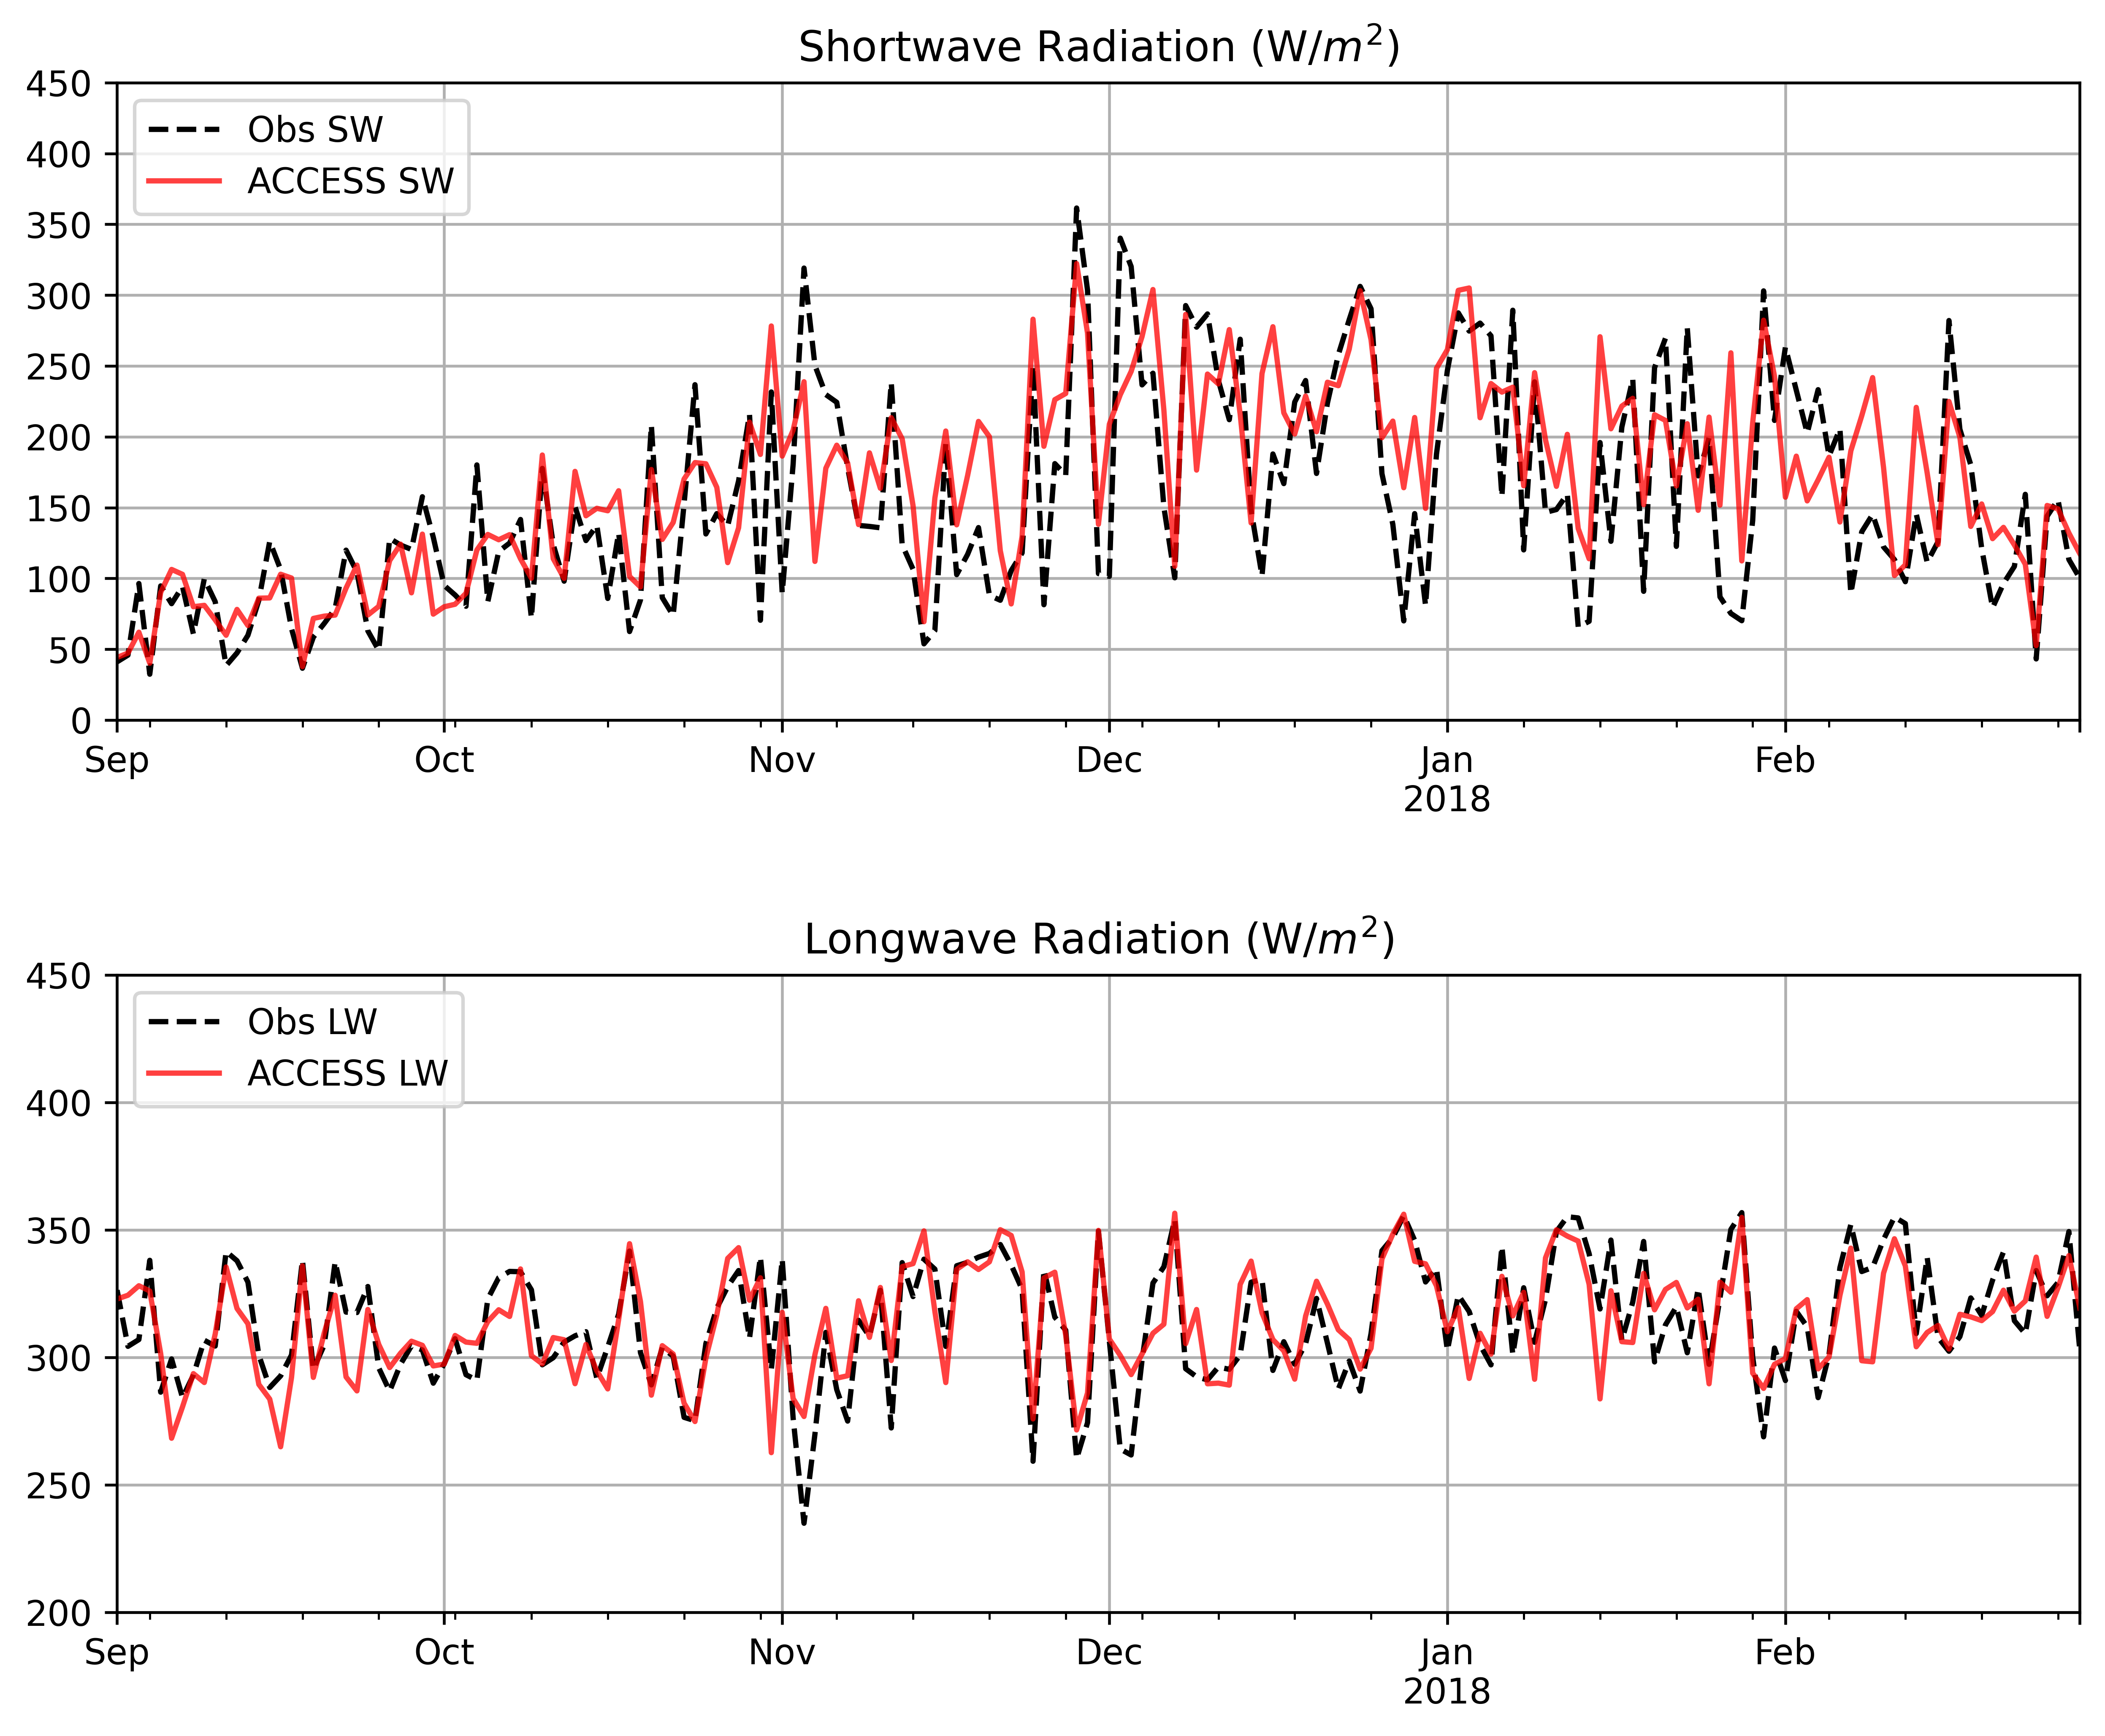

In [33]:
fig = plt.figure(figsize=(10,8),dpi=600)
plt.subplots_adjust(hspace=0.4)

ax1 = plt.subplot(211,)
daily_obs_SW.plot(label='Obs SW',color='black',linestyle='--');
daily_data1D_SW.plot(label='ACCESS SW',color='red',alpha=0.75);
plt.legend(loc = 'upper left');
plt.grid();
plt.ylim(0,450)
plt.title('Shortwave Radiation (W/$m^{2}$)')

ax2 = plt.subplot(212,)
daily_obs_LW.plot(label='Obs LW',color='black',linestyle='--');
daily_data1D_LW.plot(label='ACCESS LW',color='red',alpha=0.75);
plt.legend(loc = 'upper left');
plt.grid();
plt.ylim(200,450)
plt.title('Longwave Radiation (W/$m^{2}$)')

In [34]:
daily_data1D_SW = pd.Series(daily_data1D_SW, name='ACCESS SW')
daily_obs_SW = pd.Series(daily_obs_SW, name='Obs SW')
pd_SW = pd.concat([daily_data1D_SW,daily_obs_SW],axis=1)
pd_SW.corr()

,ACCESS SW,Obs SW
ACCESS SW,1.000000,0.766637
Obs SW,0.766637,1.000000


In [35]:
daily_data1D_LW = pd.Series(daily_data1D_LW, name='ACCESS LW')
daily_obs_LW = pd.Series(daily_obs_LW, name='Obs LW')
pd_LW = pd.concat([daily_data1D_LW,daily_obs_LW],axis=1)
pd_LW.corr()

,ACCESS LW,Obs LW
ACCESS LW,1.000000,0.799407
Obs LW,0.799407,1.000000


Text(0.5, 0, 'Longwave Radiation (W/$m^{2}$)')

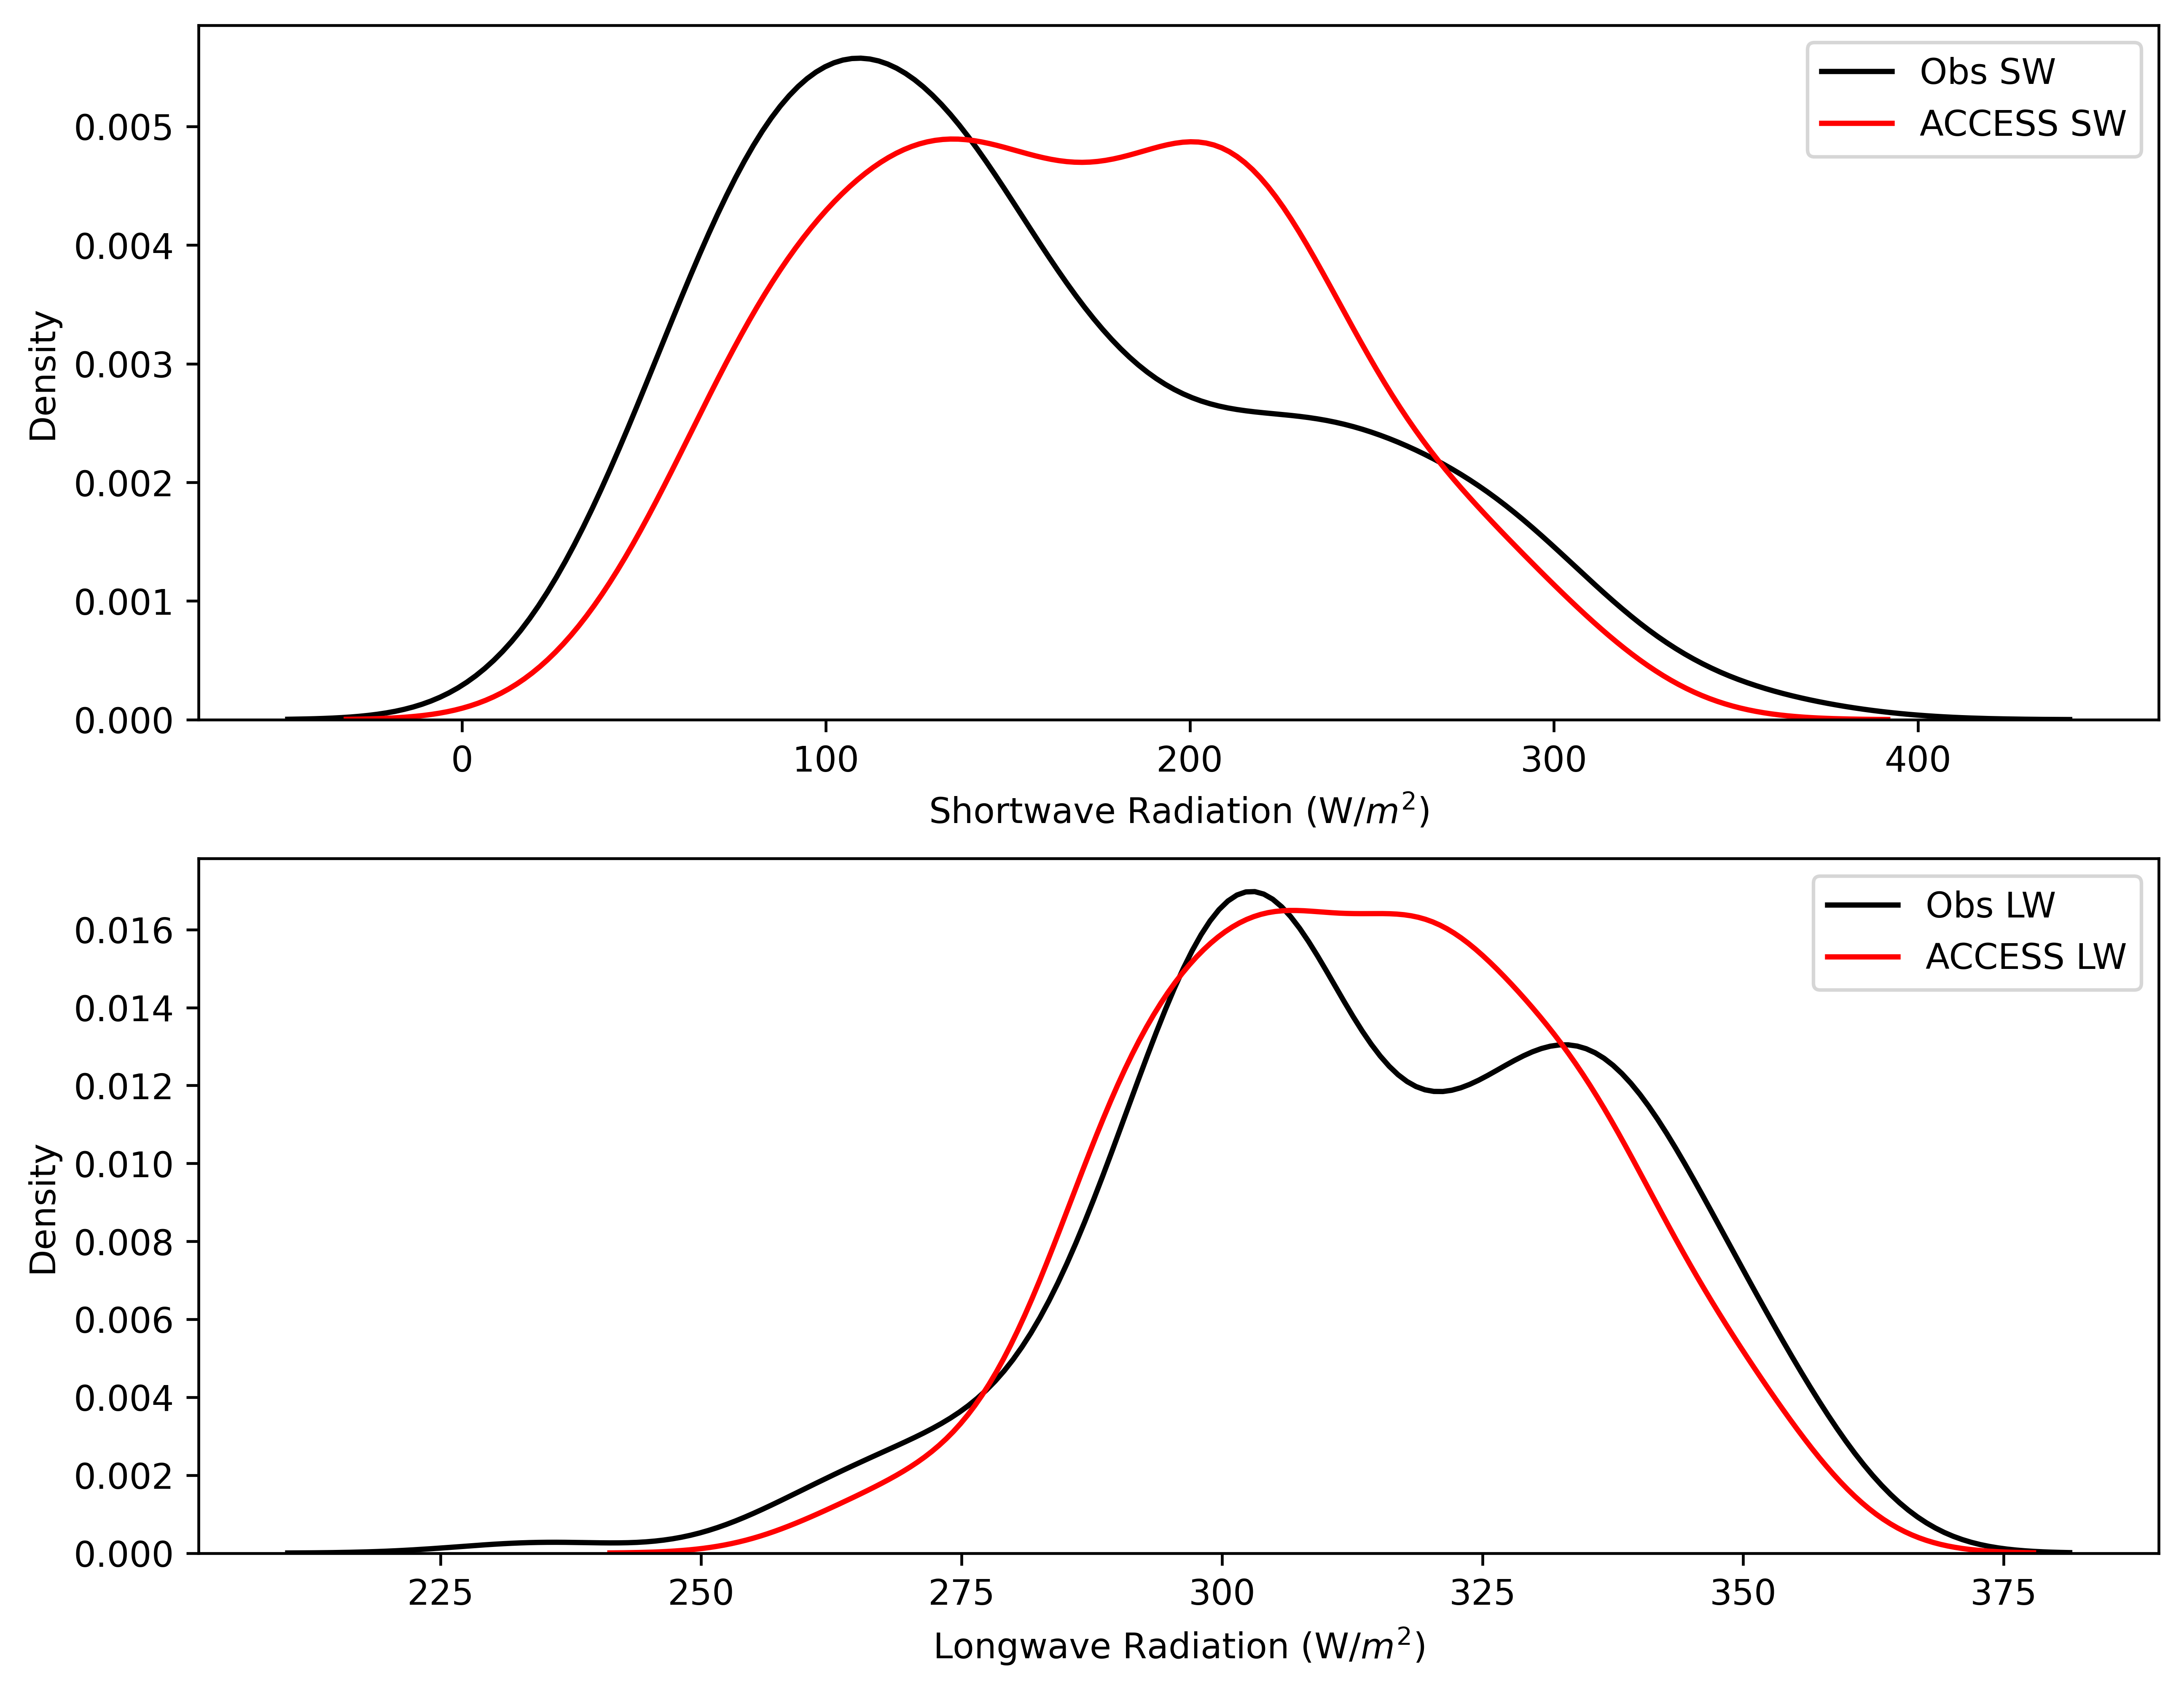

In [36]:
fig = plt.figure(figsize=(10,8),dpi=600)

ax1 = plt.subplot(211,)
sns.kdeplot(x=daily_obs_SW, label='Obs SW',color='black')
sns.kdeplot(x=daily_data1D_SW, label='ACCESS SW',color='red')
plt.legend()
plt.xlabel('Shortwave Radiation (W/$m^{2}$)')

ax2 = plt.subplot(212,)
sns.kdeplot(x=daily_obs_LW, label='Obs LW',color='black')
sns.kdeplot(x=daily_data1D_LW, label='ACCESS LW',color='red')
plt.legend()
plt.xlabel('Longwave Radiation (W/$m^{2}$)')

<ipython-input-37-c151ca7e7b5d>:13: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.hist2d(x1, y1, bins=40, norm=LogNorm(), cmap='viridis_r', vmin=1, vmax=100)
<ipython-input-37-c151ca7e7b5d>:30: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.hist2d(x2, y2, bins=25, norm=LogNorm(), cmap='viridis_r', vmin=1, vmax=100)


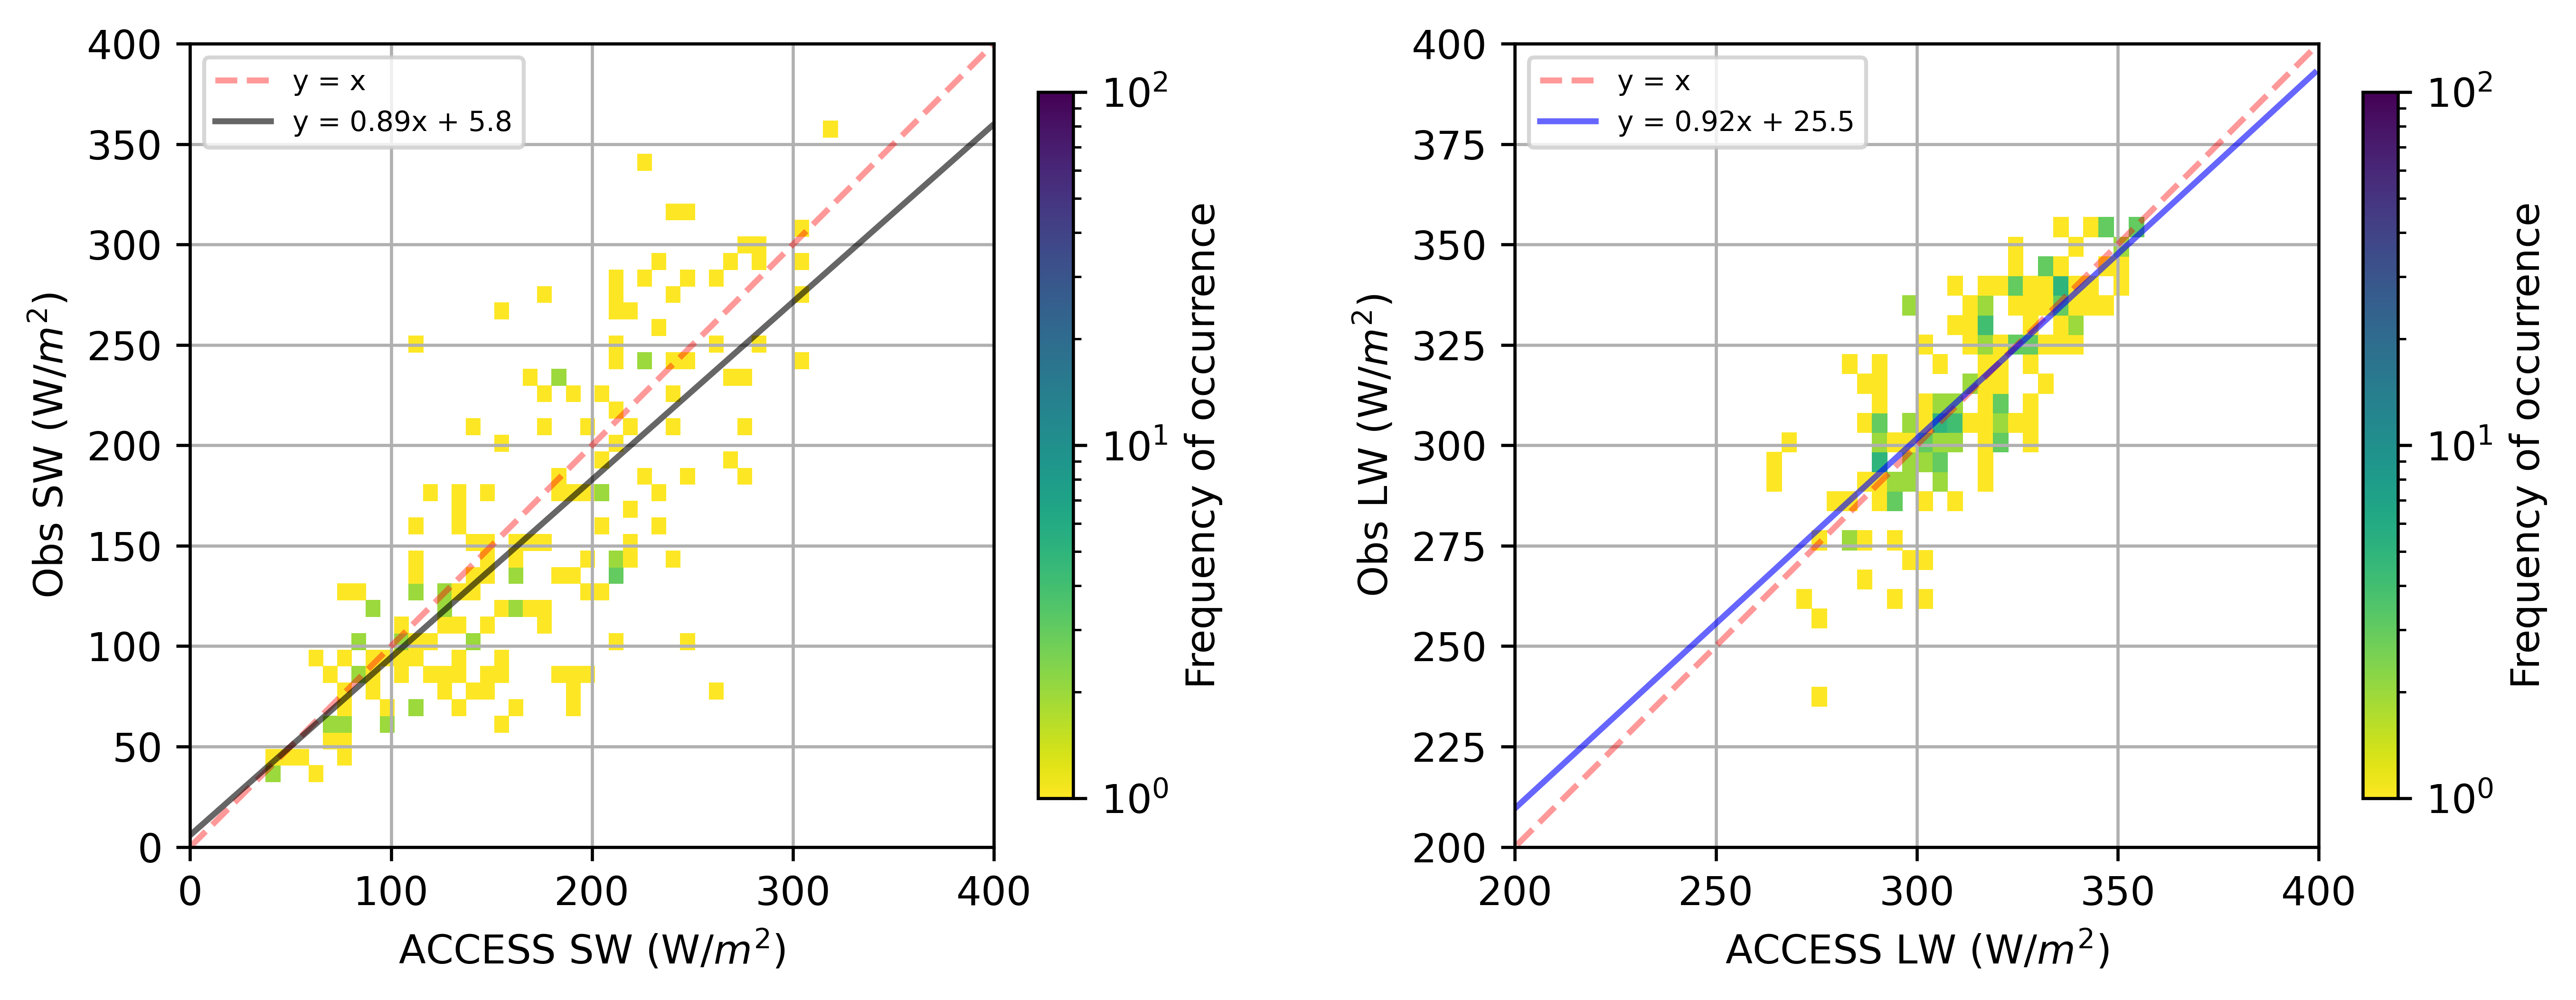

In [37]:
fig = plt.figure(figsize=(10,8), dpi=600)
plt.subplots_adjust(wspace=0.5)

ax1 = plt.subplot(121,)

x1 = daily_data1D_SW
y1 = daily_obs_SW
x = np.arange(400)

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('ACCESS SW (W/$m^{2}$)')
plt.ylabel('Obs SW (W/$m^{2}$)')
plt.hist2d(x1, y1, bins=40, norm=LogNorm(), cmap='viridis_r', vmin=1, vmax=100)
plt.xlim(0,400)
plt.ylim(0,400)
plt.plot(x,x,"--",color='r',alpha=0.4,label='y = x')
plt.plot(x,0.8852*x + 5.847,"-",color='black',alpha=0.6,label='y = 0.89x + 5.8')
plt.legend(fontsize=7)
plt.grid()
plt.colorbar(label='Frequency of occurrence', fraction=0.04)

ax2 = plt.subplot(122,)

x2 = daily_data1D_LW
y2 = daily_obs_LW

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('ACCESS LW (W/$m^{2}$)')
plt.ylabel('Obs LW (W/$m^{2}$)')
plt.hist2d(x2, y2, bins=25, norm=LogNorm(), cmap='viridis_r', vmin=1, vmax=100)
plt.xlim(200,400)
plt.ylim(200,400)
plt.plot(x,x,"--",color='r',alpha=0.4,label='y = x')
plt.plot(x,0.9203*x + 25.54,"-",color='blue',alpha=0.6,label='y = 0.92x + 25.5')
plt.legend(fontsize=7)
plt.grid()
plt.colorbar(label='Frequency of occurrence', fraction=0.04)

In [38]:
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1) 
print(p1)

z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2) 
print(p2)

 
0.8852 x + 5.847
 
0.9203 x + 25.54


In [39]:
print(np.mean(pd_data1D_SW),np.mean(daily_obs_SW))

167.22979606839374 153.84645883903048


In [40]:
print(np.std(pd_data1D_SW),np.std(daily_obs_SW))

214.88940609242277 75.3676756810982


In [41]:
print(np.mean(pd_data1D_LW),np.mean(daily_obs_LW))

313.3318691727944 313.8993936611469


In [42]:
print(np.std(pd_data1D_LW),np.std(daily_obs_LW))

26.83719019361986 23.12104078144888


Text(0, 0.5, 'Density')

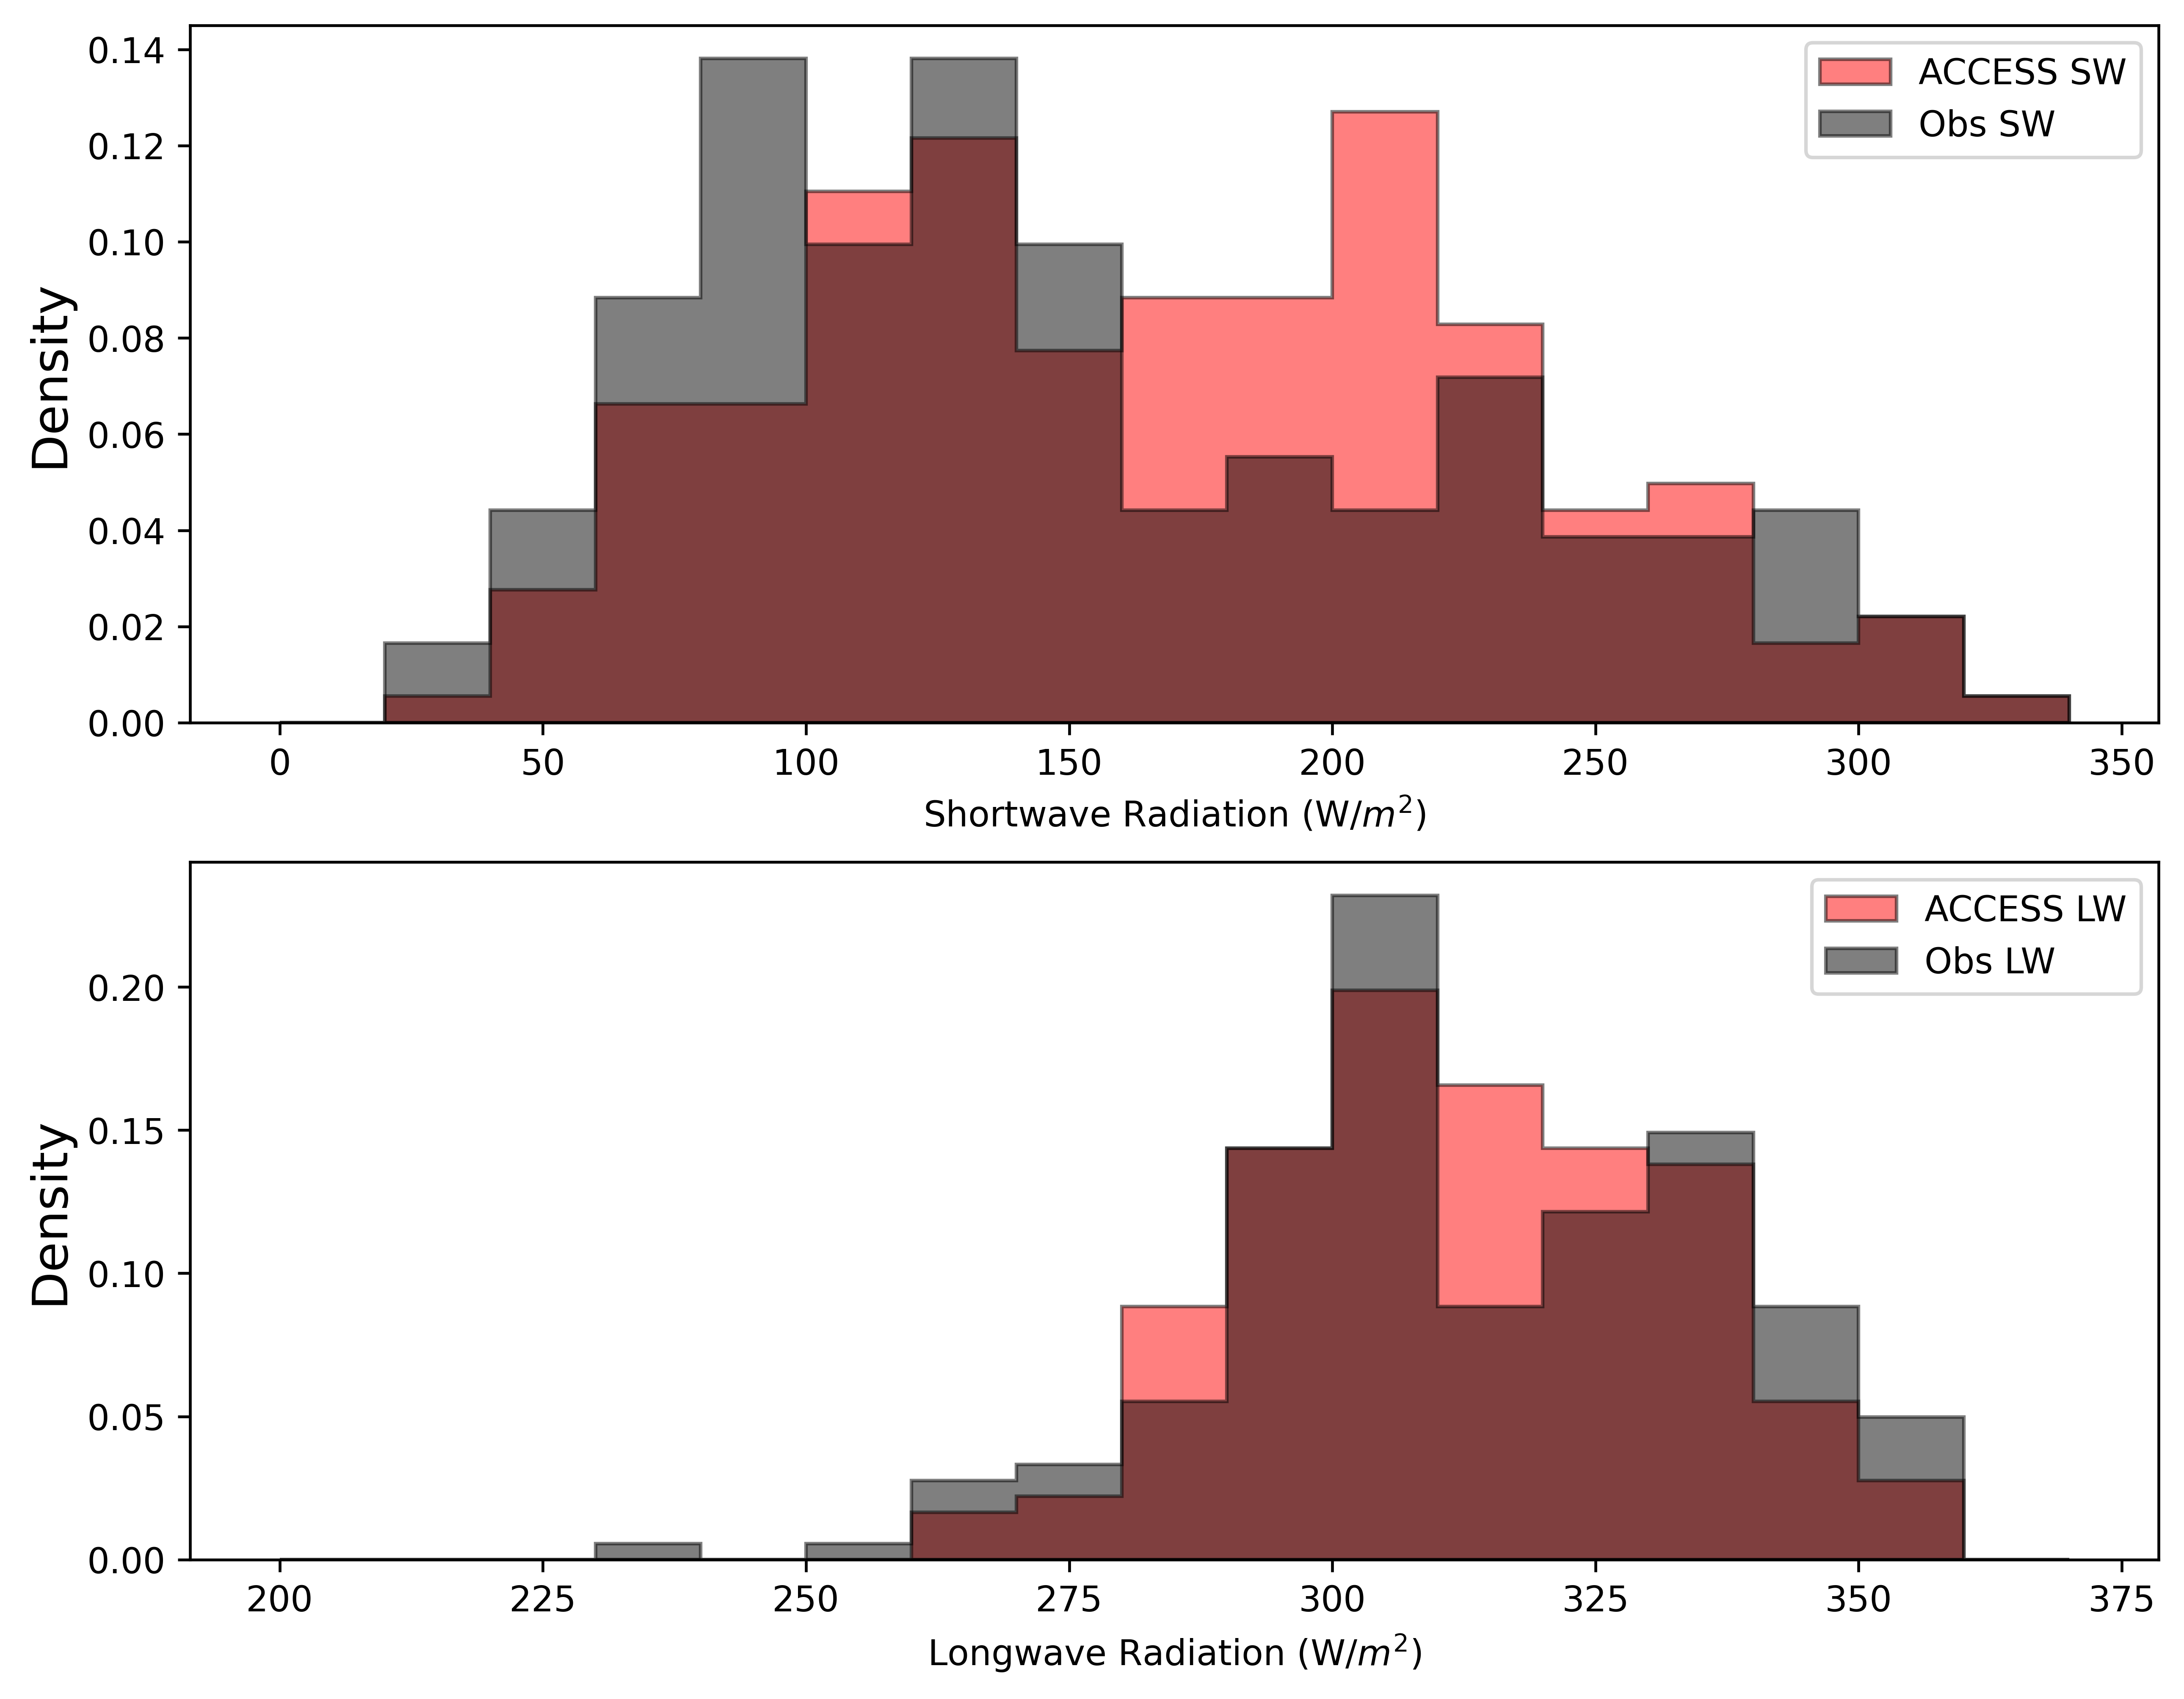

In [43]:
fig = plt.figure(figsize=(10,8),dpi=600)

ax1 = plt.subplot(211,)
weights1 = np.ones_like(daily_data1D_SW) / len(daily_data1D_SW)
weights2 = np.ones_like(daily_obs_SW) / len(daily_obs_SW)

plt.hist(daily_data1D_SW, weights=weights1, bins=np.arange(0,350,20), histtype="stepfilled", alpha=0.5, edgecolor='black', label='ACCESS SW',color='red')
plt.hist(daily_obs_SW, weights=weights2, bins=np.arange(0,350,20), histtype="stepfilled", alpha=0.5, edgecolor='black', label='Obs SW',color='black')
plt.legend()
plt.xlabel('Shortwave Radiation (W/$m^{2}$)')
ax1.set_ylabel("Density", fontsize=14)

ax2 = plt.subplot(212,)
weights3 = np.ones_like(daily_data1D_LW) / len(daily_data1D_LW)
weights4 = np.ones_like(daily_obs_LW) / len(daily_obs_LW)

plt.hist(daily_data1D_LW, weights=weights3, bins=np.arange(200,375,10), histtype="stepfilled", alpha=0.5, edgecolor='black', label='ACCESS LW',color='red')
plt.hist(daily_obs_LW, weights=weights4, bins=np.arange(200,375,10), histtype="stepfilled", alpha=0.5, edgecolor='black', label='Obs LW',color='black')
plt.legend()
plt.xlabel('Longwave Radiation (W/$m^{2}$)')
ax2.set_ylabel("Density", fontsize=14)

In [44]:
hour = pd.Series(name='Hour',dtype='string')
hourly_obs_SW_hour = pd.concat([hourly_obs_SW,hour],axis=1)
hourly_obs_LW_hour = pd.concat([hourly_obs_LW,hour],axis=1)
pd_data1D_SW = pd.Series(pd_data1D_SW,name='Hourly SW')
pd_data1D_SW_hour = pd.concat([pd_data1D_SW,hour],axis=1)
pd_data1D_LW = pd.Series(pd_data1D_LW,name='Hourly LW')
pd_data1D_LW_hour = pd.concat([pd_data1D_LW,hour],axis=1)

In [45]:
for row in hourly_obs_SW_hour.index:
    for i in np.arange(24):
        if (str(row)[11:13] == str(i).rjust(2,'0')):
            hourly_obs_SW_hour['Hour'][row] = str(i)

In [46]:
for row in hourly_obs_LW_hour.index:
    for i in np.arange(24):
        if (str(row)[11:13] == str(i).rjust(2,'0')):
            hourly_obs_LW_hour['Hour'][row] = str(i)

In [47]:
for row in pd_data1D_SW_hour.index:
    for i in np.arange(24):
        if (str(row)[11:13] == str(i).rjust(2,'0')):
            pd_data1D_SW_hour['Hour'][row] = str(i)

In [48]:
for row in pd_data1D_LW_hour.index:
    for i in np.arange(24):
        if (str(row)[11:13] == str(i).rjust(2,'0')):
            pd_data1D_LW_hour['Hour'][row] = str(i)

In [49]:
hourly_obs_SW_hour.groupby('Hour').mean()

,Hourly SW
Hour,
0,441.892439
1,434.554243
10,0.041758
11,0.018978
12,0.035858
13,0.021841
14,0.033978
15,0.025018
16,0.024026


In [50]:
hourly_obs_SW_mean = [0.033978,
0.025018,
0.024026,
3.452579,
26.073625,
65.347358,
149.337072,
224.899029,
320.226133,
393.461516,
441.892439,
434.554243,
450.887424,
391.251545,
307.570991,
233.791749,
143.528558,
76.118678,
25.173985,
4.546630, 
0.041758,
0.018978,
0.035858,
0.021841]

In [51]:
hourly_obs_LW_hour.groupby('Hour').mean()

,Hourly LW
Hour,
0,312.649125
1,311.555132
10,315.315984
11,317.402086
12,316.698886
13,317.099649
14,314.035802
15,315.167943
16,314.087051


In [52]:
hourly_obs_LW_mean = [314.035802,
315.167943,
314.087051,
313.667401,
313.071455,
313.080322,
313.828988,
316.006850,
313.486863,
312.243286,
312.649125,
311.555132,
310.124298,      
311.183768,
313.442527,
312.623015,
313.652011,
314.425315,
313.162964,
315.574725,
315.315984,
317.402086,
316.698886,
317.099649]

In [53]:
pd_data1D_SW_hour.groupby('Hour').mean()

,Hourly SW
Hour,
0,460.090906
1,483.245259
10,0.001879
11,0.000000
12,0.000000
13,0.000000
14,0.000000
15,0.000000
16,0.016470


In [54]:
pd_data1D_SW_mean = [0.000000,
0.000000,
0.016470,
5.166497,
31.818626,
86.395241,
164.959362,
251.749853,
350.671890,
421.784106,
460.090906,
483.245259,
473.184399,
410.629172,
334.949743,
256.082437,
165.169678,
84.472203,
30.606300,
4.139100,
0.001879,
0.000000,
0.000000,
0.000000]

In [55]:
pd_data1D_LW_hour.groupby('Hour').mean()

,Hourly LW
Hour,
0,312.450722
1,312.790487
10,315.007163
11,314.759668
12,314.834010
13,315.114217
14,314.545220
15,314.837408
16,315.407268


In [56]:
pd_data1D_LW_mean = [314.545220,
314.837408,
315.407268,
313.906569,
314.403510,
314.322099,
313.079335,
314.157633,
312.261436,
312.587382,
312.450722,
312.790487,
312.056628,
312.215451,
311.205957,
311.479225,
311.607288,
311.596629,
312.055525,
313.279160,
315.007163,
314.759668,
314.834010,
315.114217]

In [57]:
names = locals()
for i in np.arange(24):
    names['hourly_obs_SW_'+str(i).rjust(2,'0')]=list()
    names['hourly_obs_LW_'+str(i).rjust(2,'0')]=list()
    names['pd_data1D_SW_'+str(i).rjust(2,'0')]=list()
    names['pd_data1D_LW_'+str(i).rjust(2,'0')]=list()

In [58]:
for row in hourly_obs_SW_hour.index:
    for i in np.arange(24):
        if hourly_obs_SW_hour['Hour'][row] == str(i):
            names['hourly_obs_SW_'+str(i).rjust(2,'0')].append(hourly_obs_SW_hour['Hourly SW'][row])

In [59]:
for row in hourly_obs_LW_hour.index:
    for i in np.arange(24):
        if hourly_obs_LW_hour['Hour'][row] == str(i):
            names['hourly_obs_LW_'+str(i).rjust(2,'0')].append(hourly_obs_LW_hour['Hourly LW'][row])

In [60]:
for row in pd_data1D_SW_hour.index:
    for i in np.arange(24):
        if pd_data1D_SW_hour['Hour'][row] == str(i):
            names['pd_data1D_SW_'+str(i).rjust(2,'0')].append(pd_data1D_SW_hour['Hourly SW'][row])

In [61]:
for row in pd_data1D_LW_hour.index:
    for i in np.arange(24):
        if pd_data1D_LW_hour['Hour'][row] == str(i):
            names['pd_data1D_LW_'+str(i).rjust(2,'0')].append(pd_data1D_LW_hour['Hourly LW'][row])

In [62]:
hourly_obs_SW_5th = []
hourly_obs_LW_5th = []
pd_data1D_SW_5th = []
pd_data1D_LW_5th = []
hourly_obs_SW_95th = []
hourly_obs_LW_95th = []
pd_data1D_SW_95th = []
pd_data1D_LW_95th = []

for i in np.arange(24):
    hourly_obs_SW_5th.append(np.percentile(names['hourly_obs_SW_'+str(i).rjust(2,'0')],5))
    hourly_obs_LW_5th.append(np.percentile(names['hourly_obs_LW_'+str(i).rjust(2,'0')],5))
    pd_data1D_SW_5th.append(np.percentile(names['pd_data1D_SW_'+str(i).rjust(2,'0')],5))
    pd_data1D_LW_5th.append(np.percentile(names['pd_data1D_LW_'+str(i).rjust(2,'0')],5))
    hourly_obs_SW_95th.append(np.percentile(names['hourly_obs_SW_'+str(i).rjust(2,'0')],95))
    hourly_obs_LW_95th.append(np.percentile(names['hourly_obs_LW_'+str(i).rjust(2,'0')],95))
    pd_data1D_SW_95th.append(np.percentile(names['pd_data1D_SW_'+str(i).rjust(2,'0')],95))
    pd_data1D_LW_95th.append(np.percentile(names['pd_data1D_LW_'+str(i).rjust(2,'0')],95))

In [63]:
hourly_obs_SW_mean = [469.7846,461.6061,483.1671,421.7220,333.3981,258.6389,165.0214,90.9630,30.1753,5.4499,0.0498,0.0224,0.0395,0.0241,0.0389,0.0290,0.0282,4.1362,31.2506,77.7536,172.2729,252.1793,351.3495,420.2428]

In [64]:
hourly_obs_LW_mean = [313.9688,312.9546,311.4001,312.6621,315.6345,314.3260,315.8638,316.4239,314.1436,316.5566,316.6016,317.0365,316.1752,318.0759,315.1094,316.4283,315.5797,314.3224,313.0896,313.2783,314.1881,316.9644,314.3351,313.7930]

In [65]:
pd_data1D_SW_mean = [499.3569,532.6438,516.5921,453.7970,378.3203,290.6842,188.5277,98.9727,36.7149,5.0593,0.0020,0,0,0,0,0,0.0203,6.2210,38.2956,99.6057,188.2519,281.3255,383.5052,468.6290]

In [66]:
pd_data1D_LW_mean = [313.4593,312.2748,313.6595,313.4228,313.4277,312.8927,313.4963,314.3665,314.4979,314.7322,316.3628,316.4560,316.4416,317.4240,316.0209,316.2306,317.4127,316.4684,315.6642,315.6815,315.7375,315.2806,313.8236,313.4535]

In [67]:
hourly_obs_SW_mean = pd.Series(hourly_obs_SW_mean,name='Obs SW Mean')
hourly_obs_LW_mean = pd.Series(hourly_obs_LW_mean,name='Obs LW Mean')
pd_data1D_SW_mean = pd.Series(pd_data1D_SW_mean,name='ACCESS SW Mean')
pd_data1D_LW_mean = pd.Series(pd_data1D_LW_mean,name='ACCESS LW Mean')
hourly_obs_SW_5th = pd.Series(hourly_obs_SW_5th,name='Obs SW 5th')
hourly_obs_LW_5th = pd.Series(hourly_obs_LW_5th,name='Obs LW 5th')
pd_data1D_SW_5th = pd.Series(pd_data1D_SW_5th,name='ACCESS SW 5th')
pd_data1D_LW_5th = pd.Series(pd_data1D_LW_5th,name='ACCESS LW 5th')
hourly_obs_SW_95th = pd.Series(hourly_obs_SW_95th,name='Obs SW 95th')
hourly_obs_LW_95th = pd.Series(hourly_obs_LW_95th,name='Obs LW 95th')
pd_data1D_SW_95th = pd.Series(pd_data1D_SW_95th,name='ACCESS SW 95th')
pd_data1D_LW_95th = pd.Series(pd_data1D_LW_95th,name='ACCESS LW 95th')

In [68]:
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
hours = pd.Series(hours,name='Hour')

In [69]:
hourly_obs_SW_mean.index = hours
hourly_obs_LW_mean.index = hours
pd_data1D_SW_mean.index = hours
pd_data1D_LW_mean.index = hours
hourly_obs_SW_5th.index = hours
hourly_obs_LW_5th.index = hours
pd_data1D_SW_5th.index = hours
pd_data1D_LW_5th.index = hours
hourly_obs_SW_95th.index = hours
hourly_obs_LW_95th.index = hours
pd_data1D_SW_95th.index = hours
pd_data1D_LW_95th.index = hours

In [70]:
hourly_obs_SW_5th = []

ValueError: operands could not be broadcast together with shapes (24,) (0,) 

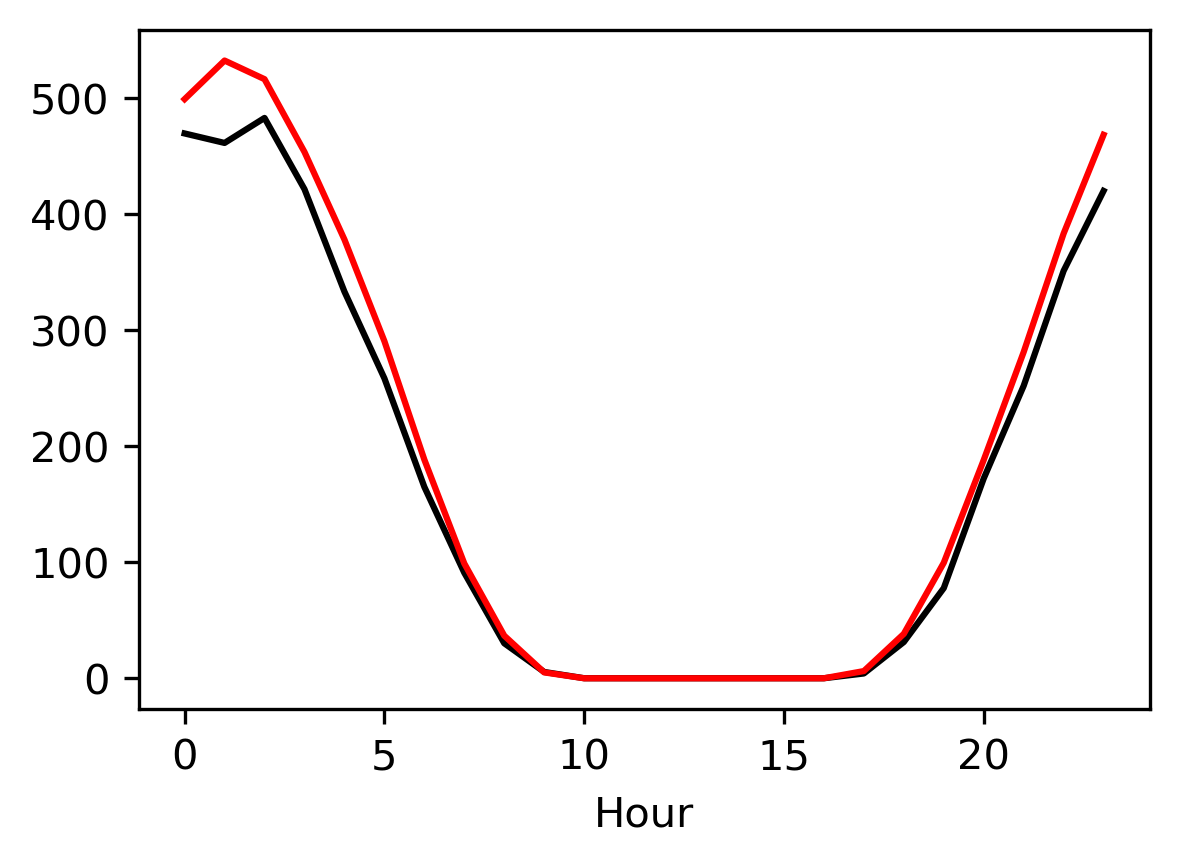

In [76]:
fig = plt.figure(figsize=(10,3),dpi=300)
plt.subplots_adjust(wspace=0.3)
x = hours

ax1 = plt.subplot(121,)
hourly_obs_SW_mean.plot(label='Obs SW',color='black');
pd_data1D_SW_mean.plot(label='ACCESS SW',color='red');
ax1.fill_between(x,hourly_obs_SW_5th,hourly_obs_SW_95th,color='black',alpha=0.1)
ax1.fill_between(x,pd_data1D_SW_5th,pd_data1D_SW_95th,color='red',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax1.xaxis.set_minor_locator(x_minor_locator)
plt.xlabel('Hour (UTC)')
plt.ylabel('Shortwave Radiation (W/$m^{2}$)')
plt.xlim(0,23)
plt.ylim(0,1100)
plt.legend(fontsize=7.5);

ax2 = plt.subplot(122,)
hourly_obs_LW_mean.plot(label='Obs LW',color='black');
pd_data1D_LW_mean.plot(label='ACCESS LW',color='red');
ax2.fill_between(x,hourly_obs_LW_5th,hourly_obs_LW_95th,color='black',alpha=0.1)
ax2.fill_between(x,pd_data1D_LW_5th,pd_data1D_LW_95th,color='red',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax2.xaxis.set_minor_locator(x_minor_locator)
plt.xlabel('Hour (UTC)')
plt.ylabel('Longwave Radiation (W/$m^{2}$)')
plt.xlim(0,23)
plt.ylim(220,400)
plt.legend(fontsize=7.5);

In [80]:
hourly_obs_SW_mean

Hour
0     469.7846
1     461.6061
2     483.1671
3     421.7220
4     333.3981
5     258.6389
6     165.0214
7      90.9630
8      30.1753
9       5.4499
10      0.0498
11      0.0224
12      0.0395
13      0.0241
14      0.0389
15      0.0290
16      0.0282
17      4.1362
18     31.2506
19     77.7536
20    172.2729
21    252.1793
22    351.3495
23    420.2428
Name: Obs SW Mean, dtype: float64

In [81]:
pd_data1D_SW_mean

Hour
0     499.3569
1     532.6438
2     516.5921
3     453.7970
4     378.3203
5     290.6842
6     188.5277
7      98.9727
8      36.7149
9       5.0593
10      0.0020
11      0.0000
12      0.0000
13      0.0000
14      0.0000
15      0.0000
16      0.0203
17      6.2210
18     38.2956
19     99.6057
20    188.2519
21    281.3255
22    383.5052
23    468.6290
Name: ACCESS SW Mean, dtype: float64

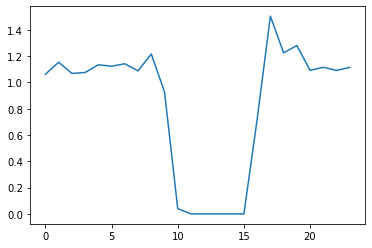

In [83]:
plt.plot(pd_data1D_SW_mean/hourly_obs_SW_mean)

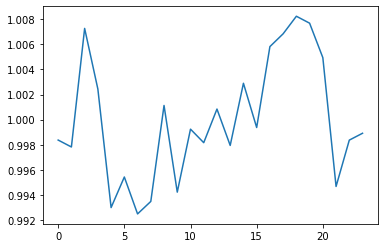

In [84]:
plt.plot(pd_data1D_LW_mean/hourly_obs_LW_mean)

In [72]:
for i in np.arange(24):
    names['bias_hourly_SW_'+str(i).rjust(2,'0')]=np.zeros(151)
    names['bias_hourly_LW_'+str(i).rjust(2,'0')]=np.zeros(151)

In [73]:
bias_hourly_SW_mean = []
bias_hourly_LW_mean = []
bias_hourly_SW_5th = []
bias_hourly_LW_5th = []
bias_hourly_SW_95th = []
bias_hourly_LW_95th = []

for i in np.arange(24):
    for j in np.arange(151):
        names['bias_hourly_SW_'+str(i).rjust(2,'0')][j] = names['pd_data1D_SW_'+str(i).rjust(2,'0')][j] - names['hourly_obs_SW_'+str(i).rjust(2,'0')][j]
        names['bias_hourly_LW_'+str(i).rjust(2,'0')][j] = names['pd_data1D_LW_'+str(i).rjust(2,'0')][j] - names['hourly_obs_LW_'+str(i).rjust(2,'0')][j]

for i in np.arange(24):
    bias_hourly_SW_mean.append(names['bias_hourly_SW_'+str(i).rjust(2,'0')].mean())
    bias_hourly_LW_mean.append(names['bias_hourly_LW_'+str(i).rjust(2,'0')].mean())
    bias_hourly_SW_5th.append(np.percentile(names['bias_hourly_SW_'+str(i).rjust(2,'0')],5))
    bias_hourly_LW_5th.append(np.percentile(names['bias_hourly_LW_'+str(i).rjust(2,'0')],5))
    bias_hourly_SW_95th.append(np.percentile(names['bias_hourly_SW_'+str(i).rjust(2,'0')],95))
    bias_hourly_LW_95th.append(np.percentile(names['bias_hourly_LW_'+str(i).rjust(2,'0')],95))

In [74]:
bias_hourly_SW_mean = pd.Series(bias_hourly_SW_mean,name='Model-Obs SW Mean')
bias_hourly_LW_mean = pd.Series(bias_hourly_LW_mean,name='Model-Obs LW Mean')
bias_hourly_SW_5th = pd.Series(bias_hourly_SW_5th,name='Model-Obs SW 5th')
bias_hourly_LW_5th = pd.Series(bias_hourly_LW_5th,name='Model-Obs LW 5th')
bias_hourly_SW_95th = pd.Series(bias_hourly_SW_95th,name='Model-Obs SW 95th')
bias_hourly_LW_95th = pd.Series(bias_hourly_LW_95th,name='Model-Obs LW 95th')

In [75]:
bias_hourly_SW_mean.index = hours
bias_hourly_LW_mean.index = hours
bias_hourly_SW_5th.index = hours
bias_hourly_LW_5th.index = hours
bias_hourly_SW_95th.index = hours
bias_hourly_LW_95th.index = hours

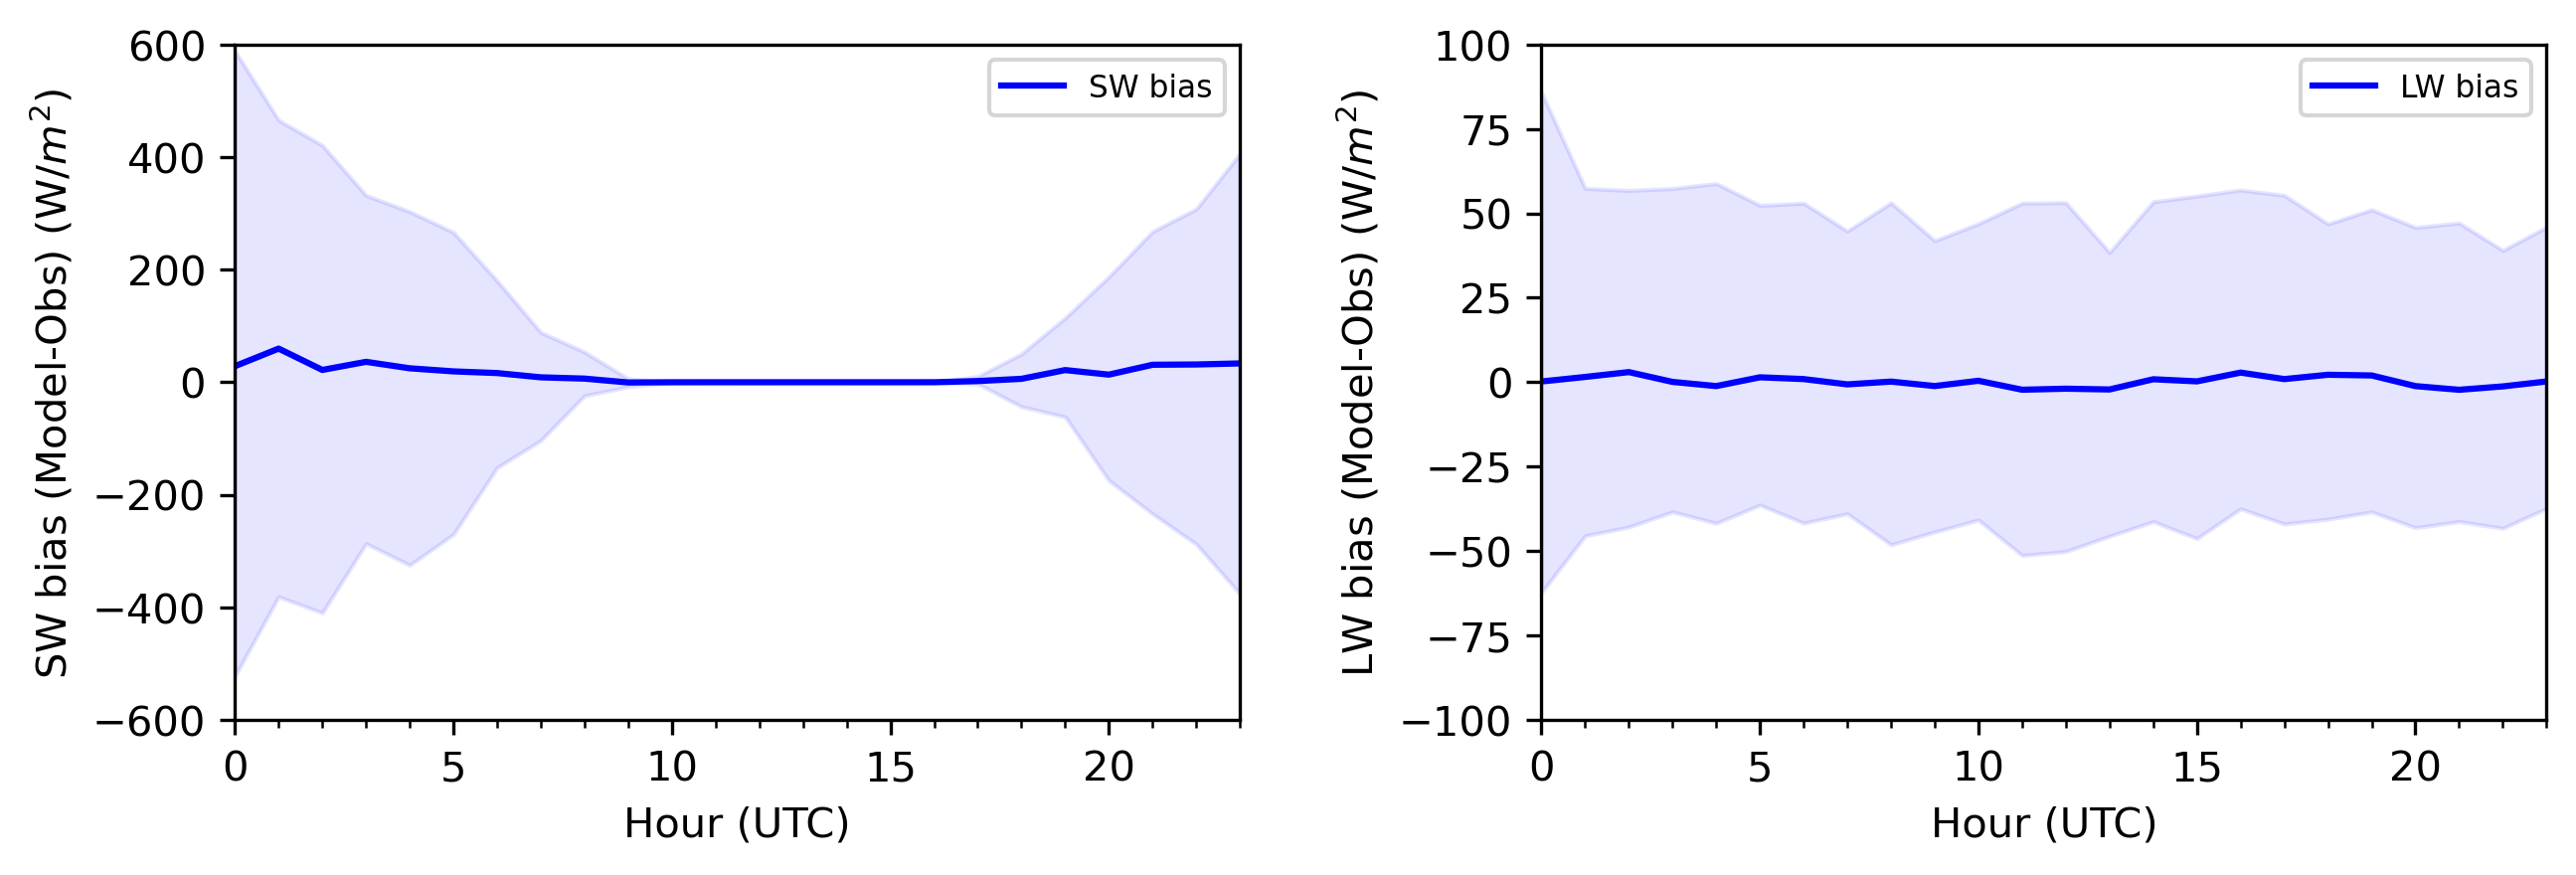

In [77]:
fig = plt.figure(figsize=(10,3),dpi=300)
plt.subplots_adjust(wspace=0.3)
x = hours

ax1 = plt.subplot(121,)
bias_hourly_SW_mean.plot(label='SW bias',color='blue');
ax1.fill_between(x,bias_hourly_SW_5th,bias_hourly_SW_95th,color='blue',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax1.xaxis.set_minor_locator(x_minor_locator)
plt.xlabel('Hour (UTC)')
plt.ylabel('SW bias (Model-Obs) (W/$m^{2}$)')
plt.xlim(0,23)
plt.ylim(-600,600)
plt.legend(fontsize=7.5);

ax2 = plt.subplot(122,)
bias_hourly_LW_mean.plot(label='LW bias',color='blue');
ax2.fill_between(x,bias_hourly_LW_5th,bias_hourly_LW_95th,color='blue',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax2.xaxis.set_minor_locator(x_minor_locator)
plt.xlabel('Hour (UTC)')
plt.ylabel('LW bias (Model-Obs) (W/$m^{2}$)')
plt.xlim(0,23)
plt.ylim(-100,100)
plt.legend(fontsize=7.5);

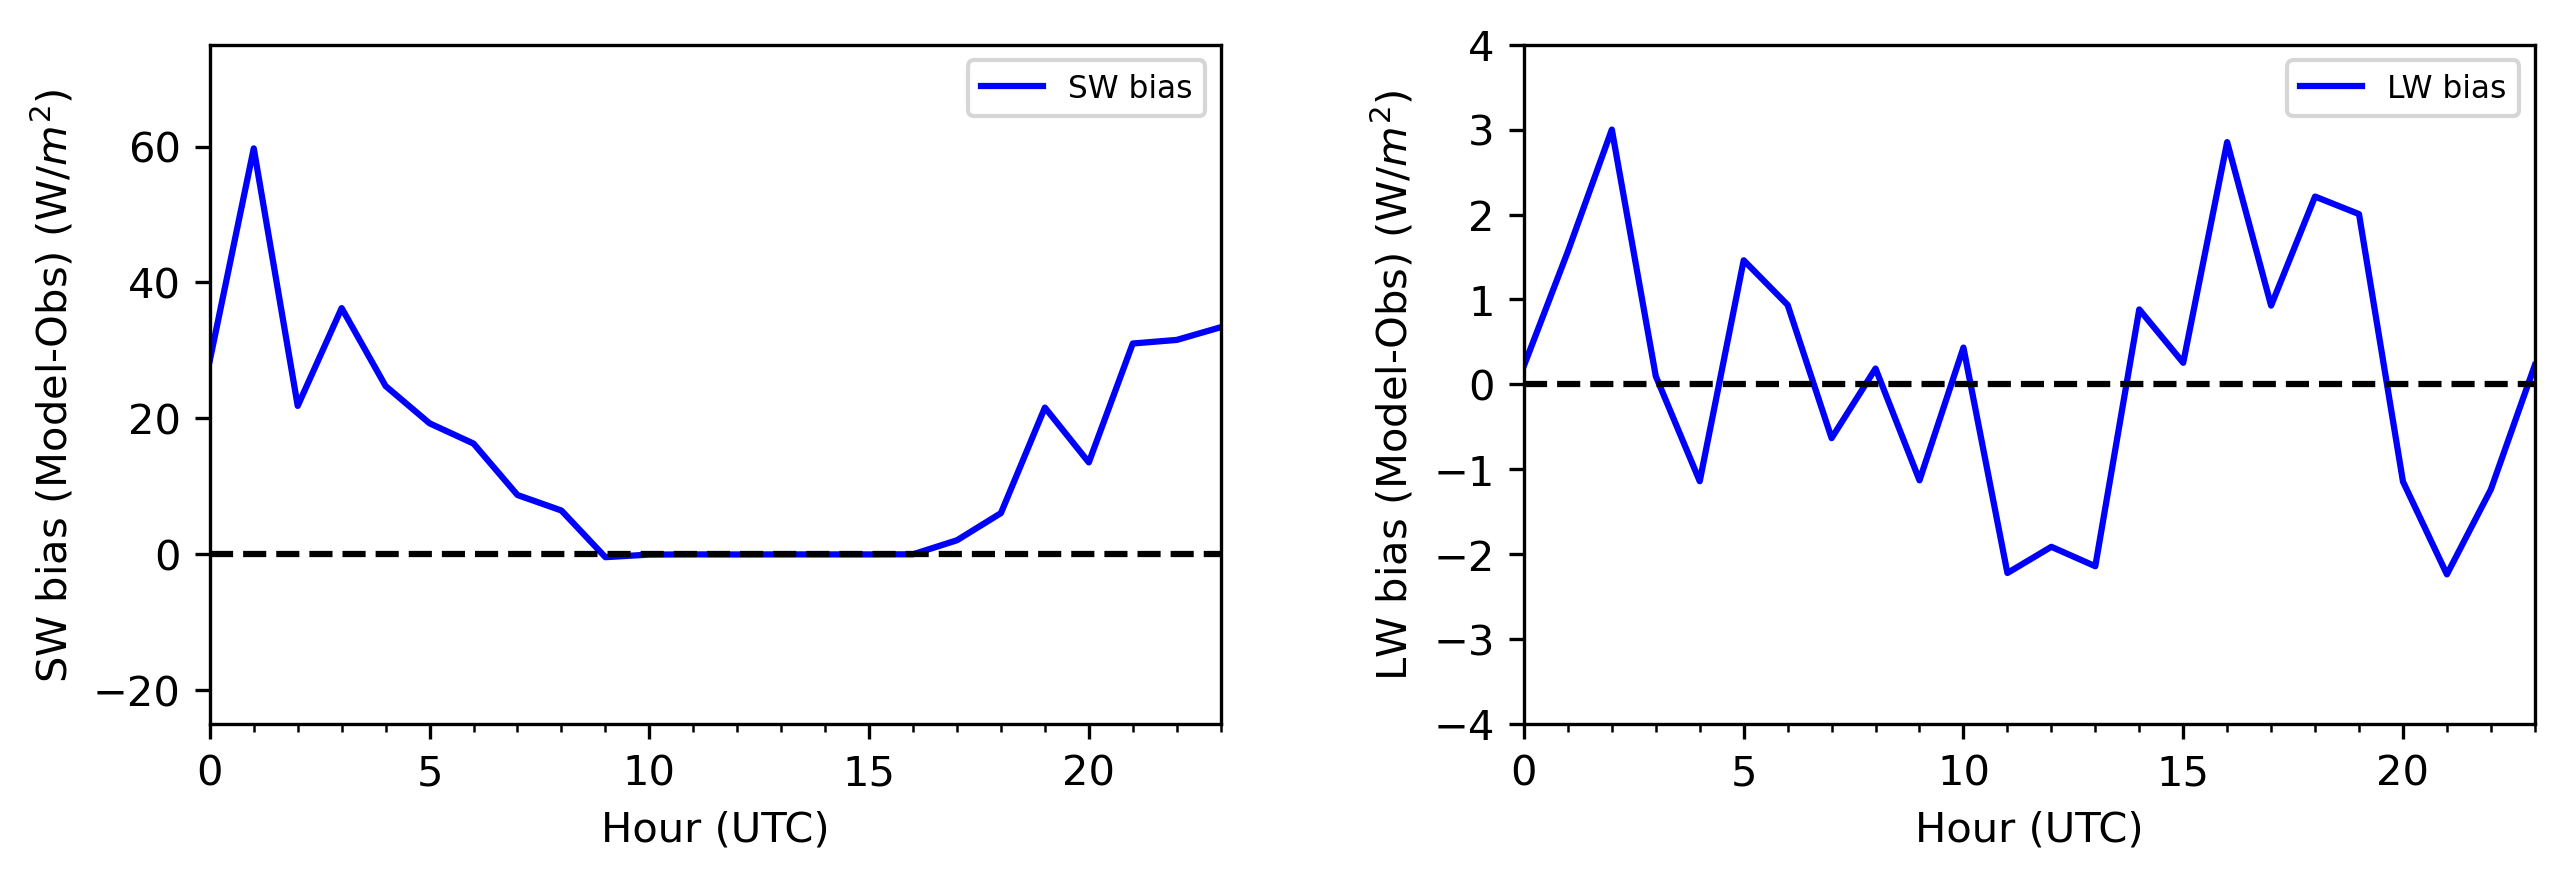

In [78]:
fig = plt.figure(figsize=(10,3),dpi=300)
plt.subplots_adjust(wspace=0.3)
x = hours

ax1 = plt.subplot(121,)
bias_hourly_SW_mean.plot(label='SW bias',color='blue');
x_minor_locator = MultipleLocator(1)
ax1.xaxis.set_minor_locator(x_minor_locator)
plt.plot(x,np.zeros(24),"--",color='black')
plt.xlabel('Hour (UTC)')
plt.ylabel('SW bias (Model-Obs) (W/$m^{2}$)')
plt.xlim(0,23)
plt.ylim(-25,75)
plt.legend(fontsize=7.5);

ax2 = plt.subplot(122,)
bias_hourly_LW_mean.plot(label='LW bias',color='blue');
x_minor_locator = MultipleLocator(1)
ax2.xaxis.set_minor_locator(x_minor_locator)
plt.plot(x,np.zeros(24),"--",color='black')
plt.xlabel('Hour (UTC)')
plt.ylabel('LW bias (Model-Obs) (W/$m^{2}$)')
plt.xlim(0,23)
plt.ylim(-4,4)
plt.legend(fontsize=7.5);